# Classes de Municípios por Nível de Integração

## Preparação do Notebook

* Importação das principais bibliotecas
* Configuração das operações por default (estilos e tamanhos de gráficos)
* Referenciamento das subpastas do projeto

In [99]:
# importação de bibliotecas básicas

import pandas as pd # Biblioteca para operação avançada com dados tabulares de diversos tipos
import numpy as np # Biblioteca para operação com vetores de auto desempenho e um tipo por vez
from matplotlib import use as mpl_use # Função Matplotlib que estabelece backend e precisa ser chamda antes do plt
mpl_use('nbagg') # uso do backend "nbagg" para os gráficos terem paineis interativos
import matplotlib.pyplot as plt # Biblioteca para geração de gráficos de menor nível de abstração
import seaborn as sns # Biblioteca baseada em matplotlib para geração de gráficos e estilização, com maior nível de abstração
import geopandas as gpd # Biblioteca de análise geográfica
import descartes # Dependência do Geopandas para poder gerar mapas
import matplotlib 
import os

In [100]:
# configurações das operações por default

# Configuração de DataFrame Pandas para formato numérico com duas casas decimais quando a coluna for float
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Apresentação dos gráficos no interior das células
%matplotlib inline 
plt.style.use('ggplot') # Apresentação dos gráficos
plt.rcParams['figure.figsize'] = [20,10]
# Códigos abaixo são configurações que deixo por opção, caso se tornem úteis em alguma operação
# Configuração das Células para que apresentam múltiplos resultados em vez de apenas o último 
# InteractiveShell.ast_node_interactivity = "all"
# sns.set() # Configuração de Gráficos para padrão de formatação básica da biblioteca Seaborn

## kmeans

Preciso tratar a questão das metrópoles

Talvez todas as metrópoles, inclusive São Paulo, devam ter um mesmo código. Talvez não.

Uma coisas que é importante é que o código metrópole não se refira somente ao polo metropolitano, mas aos municípios a ele mais integrados. talvez, seja preciso um código condicao metropolitana 2, 1, 0 para 2 é o polo, 1 é o municipio participante da aglomeracao e 0 são municípios que não fazem parte de espaço metropolitano. No entanto, isso deve necessitar ser tratado por OneHotEnconding

In [153]:
df_fatores_geograficos = pd.read_csv('fatores_para_k_means.csv', decimal=',', sep=';')

In [154]:
df_fatores_geograficos

,cod_mun,UF,Município,pop2019,pib2017milreais,export_fob_2019,import_fob_2019,pip_per_capita17,hierarquia_urbana07,hierarquia,...,dia3003,dia3103,dia0104,dia0204,dia0304,dia0404,dia0504,data_primeiro_caso,data_padrao,dias_contaminação_referencia
0,1100015,RO,Alta Floresta D'Oeste,22945,498864,198695,13294,1961,Centro Local,1,...,0,0,0,0,0,0,0,NaN,24/02/2020,nan
1,1100023,RO,Ariquemes,107863,2296074,38002769,738809,2139,Centro Subregional B,4,...,0,0,0,0,0,0,0,10/04/2020,24/02/2020,46.0000
2,1100031,RO,Cabixi,5312,138894,137660,0,2232,Centro Local,1,...,0,0,0,0,0,0,0,NaN,24/02/2020,nan
3,1100049,RO,Cacoal,85359,2127523,20514957,53854,2404,Centro Subregional B,4,...,0,0,0,0,0,0,0,NaN,24/02/2020,nan
4,1100056,RO,Cerejeiras,16323,448524,97838806,59259,2501,Centro de Zona B,2,...,0,0,0,0,0,0,0,NaN,24/02/2020,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,5222005,GO,Vianópolis,13863,395787,0,0,2894,Centro Local,1,...,0,0,0,0,0,0,0,07/04/2020,24/02/2020,43.0000
5566,5222054,GO,Vicentinópolis,8743,350765,6518444,0,4177,Centro Local,1,...,0,0,0,0,0,0,0,NaN,24/02/2020,nan
5567,5222203,GO,Vila Boa,6171,137500,0,0,2399,Centro Local,1,...,0,0,0,0,0,0,0,NaN,24/02/2020,nan
5568,5222302,GO,Vila Propício,5821,182175,0,0,3202,Centro Local,1,...,0,0,0,0,0,0,0,NaN,24/02/2020,nan


In [155]:
df_fatores_geograficos.columns

Index(['cod_mun', 'UF', 'Município', 'pop2019', 'pib2017milreais',
       'export_fob_2019', 'import_fob_2019', 'pip_per_capita17',
       'hierarquia_urbana07', 'hierarquia', 'voos_dom', 'voos_int',
       'indice_proximidade', 'indice_intermediacao', 'turismo',
       'peso_integracao_interna', 'peso_integracao_geral', 'classe_pop',
       'classe_pib', 'classe_capita', 'classe_exportacao', 'classe_importacao',
       'classe_voos_domesticos', 'classe_proximidade', 'dia2502', 'dia2602',
       'dia2702', 'dia2802', 'dia2902', 'dia0103', 'dia0203', 'dia0303',
       'dia0403', 'dia0503', 'dia0603', 'dia0703', 'dia0803', 'dia0903',
       'dia1003', 'dia1103', 'dia1203', 'dia1303', 'dia1403', 'dia1503',
       'dia1603', 'dia1703', 'dia1803', 'dia1903', 'dia2003', 'dia2103',
       'dia2203', 'dia2303', 'dia2403', 'dia2503', 'dia2603', 'dia2703',
       'dia2803', 'dia2903', 'dia3003', 'dia3103', 'dia0104', 'dia0204',
       'dia0304', 'dia0404', 'dia0504', 'data_primeiro_caso', 'data_

In [156]:
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

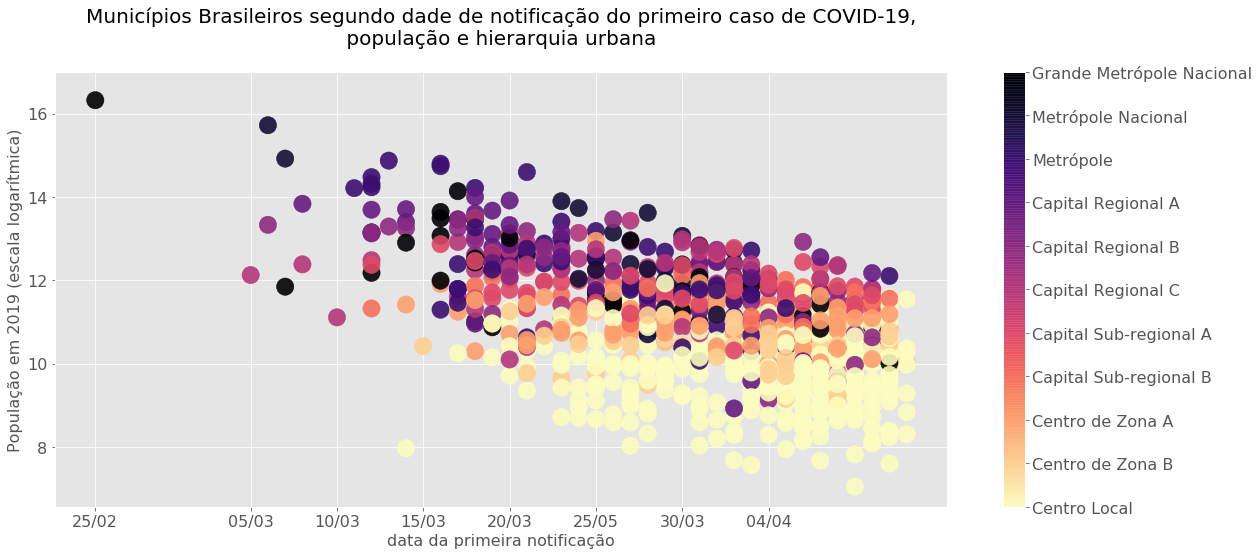

In [157]:
filtro_dias = df_fatores_geograficos.dias_contaminação_referencia >= 0

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(20,8))

color_map = plt.cm.get_cmap('magma')
color_map = color_map.reversed()

scatter = plt.scatter(c=df_fatores_geograficos['hierarquia'][filtro_dias], 
            x=df_fatores_geograficos.dias_contaminação_referencia[filtro_dias],
            y=np.log(df_fatores_geograficos.pop2019[filtro_dias]),
            alpha=0.9,
            cmap=color_map,
            s= 300);

ax.set_title('Municípios Brasileiros segundo dade de notificação do primeiro caso de COVID-19,\n população e hierarquia urbana \n')
teste = plt.colorbar(ticks=[0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10,  11])
# teste.set_label('Hierarquia Urbana', rotation=270)
teste.ax.set_yticklabels(['Sem Classificação','Centro Local', 'Centro de Zona B', 'Centro de Zona A', 'Capital Sub-regional B', 'Capital Sub-regional A', 'Capital Regional C', 'Capital Regional B', 'Capital Regional A', 'Metrópole', 'Metrópole Nacional', 'Grande Metrópole Nacional'])  # horizontal colorbar

plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('data da primeira notificação')
plt.ylabel('População em 2019 (escala logarítmica)');
plt.ylim(top=17)

plt.xticks([1, 10, 15, 20, 25, 30, 35, 40], ['25/02', '05/03', '10/03', '15/03', '20/03', '25/05', '30/03', '04/04'])
plt.savefig('covid_pop_hierarquia.png')
#lgnd = plt.legend(handles=handles, loc="lower left", scatterpoints=1)

#legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")
#lgnd.legendHandles[0]._sizes = [30]
#lgnd.legendHandles[1]._sizes = [30]

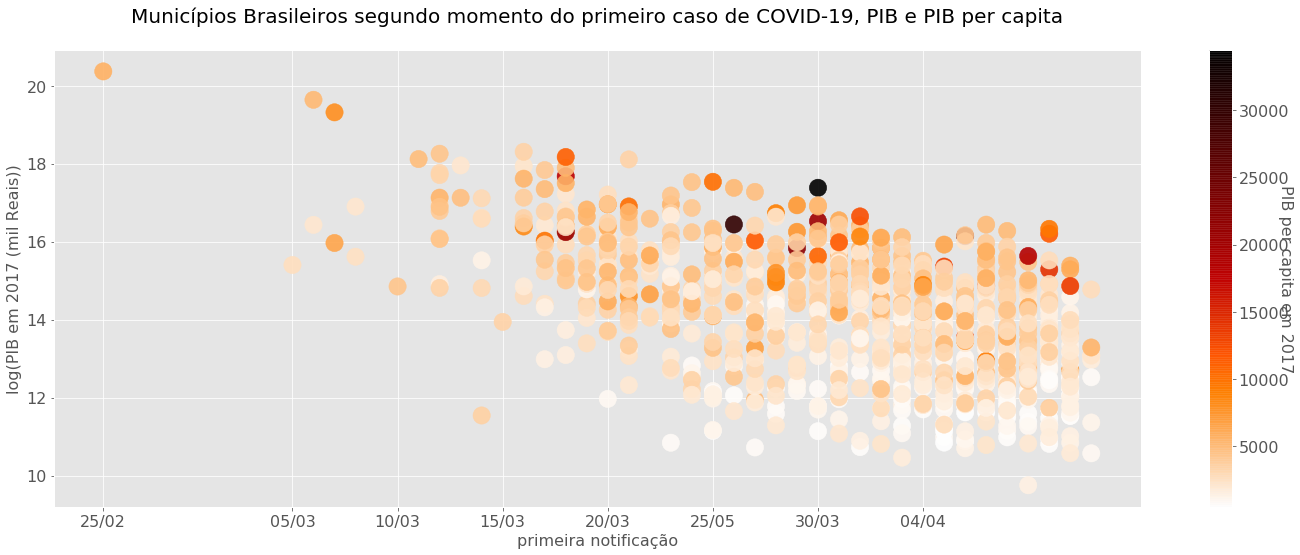

In [158]:
filtro_dias = df_fatores_geograficos.dias_contaminação_referencia >= 0

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(20,8))

color_map = plt.cm.get_cmap('gist_heat')
color_map = color_map.reversed()

scatter = plt.scatter(c=df_fatores_geograficos['pip_per_capita17'][filtro_dias], 
            x=df_fatores_geograficos.dias_contaminação_referencia[filtro_dias],
            y=np.log(df_fatores_geograficos.pib2017milreais[filtro_dias]),
            alpha=0.9,
            cmap=color_map,
            s= 300);

ax.set_title('Municípios Brasileiros segundo momento do primeiro caso de COVID-19, PIB e PIB per capita\n')

teste = plt.colorbar()
teste.set_label('PIB per capita em 2017', rotation=270)
#teste.ax.set_yticklabels(['Sem Classificação','Centro Local', 'Centro de Zona B', 'Centro de Zona A', 'Capital Sub-regional B', 'Capital Sub-regional A', 'Capital Regional C', 'Capital Regional B', 'Capital Regional A', 'Metrópole', 'Metrópole Nacional', 'Grande Metrópole Nacional'])  # horizontal colorbar

plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('primeira notificação')
plt.ylabel('log(PIB em 2017 (mil Reais))');

plt.tight_layout()

plt.xticks([1, 10, 15, 20, 25, 30, 35, 40], ['25/02', '05/03', '10/03', '15/03', '20/03', '25/05', '30/03', '04/04'])
plt.savefig('covid_pib_pibpercapita.png')

#lgnd = plt.legend(handles=handles, loc="lower left", scatterpoints=1)

#legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")
#lgnd.legendHandles[0]._sizes = [30]
#lgnd.legendHandles[1]._sizes = [30]

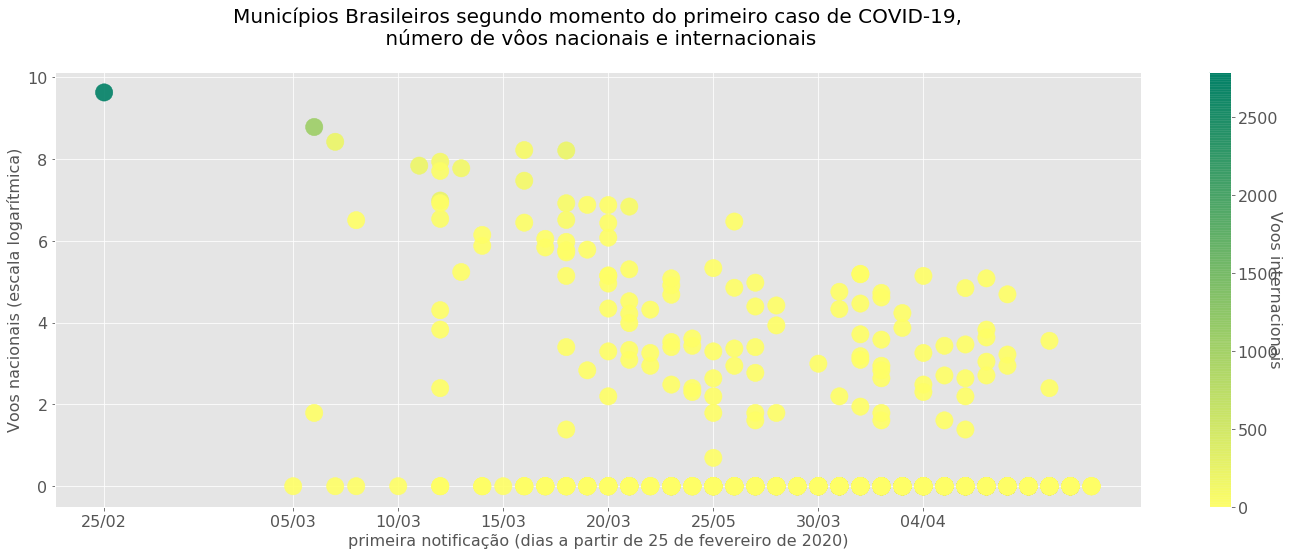

In [159]:
filtro_dias = df_fatores_geograficos.dias_contaminação_referencia >= 0

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(20,8))

color_map = plt.cm.get_cmap('summer')
color_map = color_map.reversed()

scatter = plt.scatter(c=df_fatores_geograficos['voos_int'][filtro_dias], 
            x=df_fatores_geograficos.dias_contaminação_referencia[filtro_dias],
            y=np.log(df_fatores_geograficos.voos_dom[filtro_dias] + 1),
            alpha=0.9,
            cmap=color_map,
            s= 300);

ax.set_title('Municípios Brasileiros segundo momento do primeiro caso de COVID-19,\n número de vôos nacionais e internacionais\n')

teste = plt.colorbar()
teste.set_label('Voos internacionais', rotation=270)
#teste.ax.set_yticklabels(['Sem Classificação','Centro Local', 'Centro de Zona B', 'Centro de Zona A', 'Capital Sub-regional B', 'Capital Sub-regional A', 'Capital Regional C', 'Capital Regional B', 'Capital Regional A', 'Metrópole', 'Metrópole Nacional', 'Grande Metrópole Nacional'])  # horizontal colorbar

plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('primeira notificação (dias a partir de 25 de fevereiro de 2020)')
plt.ylabel('Voos nacionais (escala logarítmica)');

plt.tight_layout()

plt.xticks([1, 10, 15, 20, 25, 30, 35, 40], ['25/02', '05/03', '10/03', '15/03', '20/03', '25/05', '30/03', '04/04'])
plt.savefig('covid_voos.png')

#plt.savefig('covid.png')
#lgnd = plt.legend(handles=handles, loc="lower left", scatterpoints=1)

#legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")
#lgnd.legendHandles[0]._sizes = [30]
#lgnd.legendHandles[1]._sizes = [30]

C:\Users\Acer A315\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


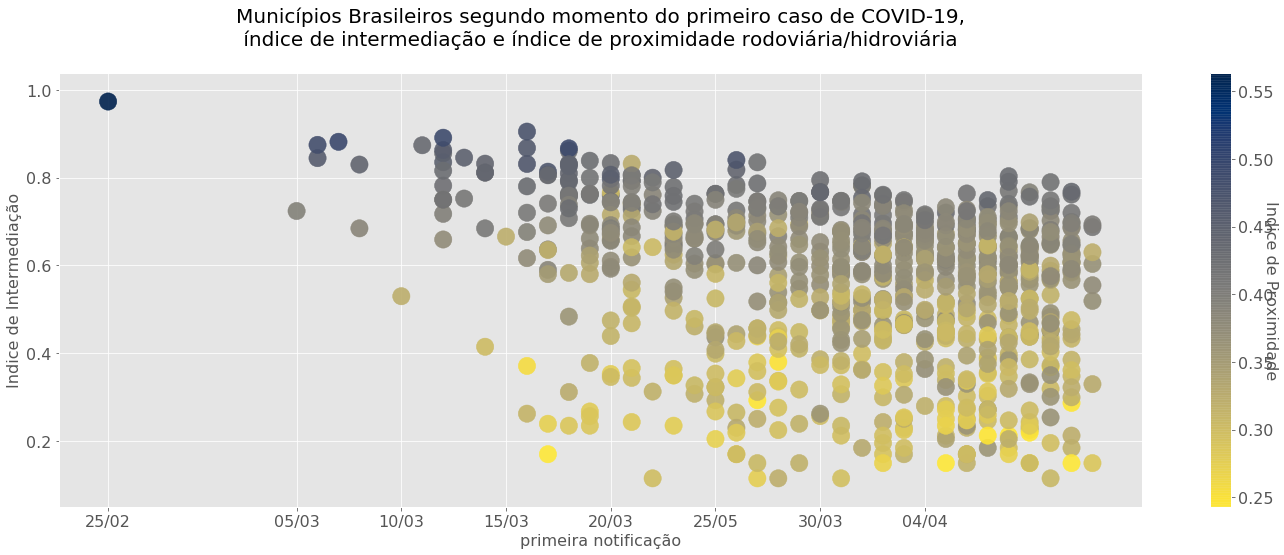

In [160]:
filtro_dias = df_fatores_geograficos.dias_contaminação_referencia >= 0

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(20,8))

color_map = plt.cm.get_cmap('cividis')
color_map = color_map.reversed()

scatter = plt.scatter(c=df_fatores_geograficos['indice_proximidade'][filtro_dias], 
            x=df_fatores_geograficos.dias_contaminação_referencia[filtro_dias],
            y=(np.log(df_fatores_geograficos.indice_intermediacao[filtro_dias]*1000000000))/20,
            alpha=0.9,
            cmap=color_map,
            s= 300);

ax.set_title('Municípios Brasileiros segundo momento do primeiro caso de COVID-19,\n índice de intermediação e índice de proximidade rodoviária/hidroviária \n')

teste = plt.colorbar()
teste.set_label('Indice de Proximidade', rotation=270)
#teste.ax.set_yticklabels(['Sem Classificação','Centro Local', 'Centro de Zona B', 'Centro de Zona A', 'Capital Sub-regional B', 'Capital Sub-regional A', 'Capital Regional C', 'Capital Regional B', 'Capital Regional A', 'Metrópole', 'Metrópole Nacional', 'Grande Metrópole Nacional'])  # horizontal colorbar

plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('primeira notificação')
plt.ylabel('Indice de Intermediação');

plt.tight_layout()

plt.xticks([1, 10, 15, 20, 25, 30, 35, 40], ['25/02', '05/03', '10/03', '15/03', '20/03', '25/05', '30/03', '04/04'])
plt.savefig('covid_indice_intermediacao.png')


#plt.savefig('covid.png')
#lgnd = plt.legend(handles=handles, loc="lower left", scatterpoints=1)

#legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")
#lgnd.legendHandles[0]._sizes = [30]
#lgnd.legendHandles[1]._sizes = [30]

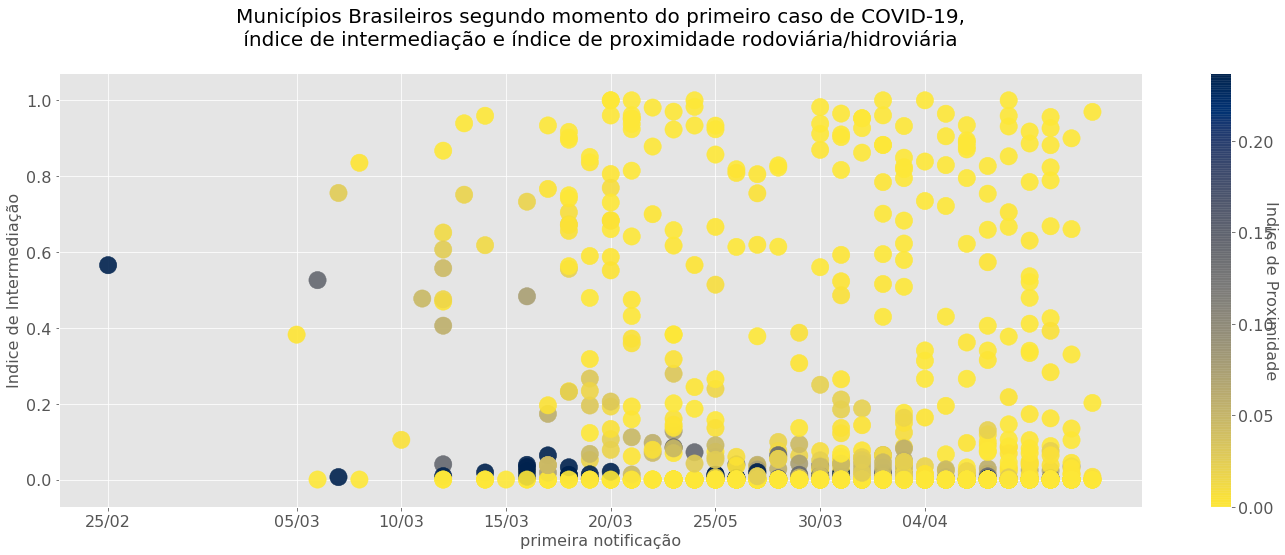

In [161]:
filtro_dias = df_fatores_geograficos.dias_contaminação_referencia >= 0

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(20,8))

color_map = plt.cm.get_cmap('cividis')
color_map = color_map.reversed()

scatter = plt.scatter(c=df_fatores_geograficos['peso_integracao_geral'][filtro_dias], 
            x=df_fatores_geograficos.dias_contaminação_referencia[filtro_dias],
            y=df_fatores_geograficos.peso_integracao_interna[filtro_dias],
            alpha=0.9,
            cmap=color_map,
            s= 300);

ax.set_title('Municípios Brasileiros segundo momento do primeiro caso de COVID-19,\n índice de intermediação e índice de proximidade rodoviária/hidroviária \n')

teste = plt.colorbar()
teste.set_label('Indice de Proximidade', rotation=270)
#teste.ax.set_yticklabels(['Sem Classificação','Centro Local', 'Centro de Zona B', 'Centro de Zona A', 'Capital Sub-regional B', 'Capital Sub-regional A', 'Capital Regional C', 'Capital Regional B', 'Capital Regional A', 'Metrópole', 'Metrópole Nacional', 'Grande Metrópole Nacional'])  # horizontal colorbar

plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('primeira notificação')
plt.ylabel('Indice de Intermediação');

plt.tight_layout()

plt.xticks([1, 10, 15, 20, 25, 30, 35, 40], ['25/02', '05/03', '10/03', '15/03', '20/03', '25/05', '30/03', '04/04'])
plt.savefig('covid_indice_intermediacao.png')


#plt.savefig('covid.png')
#lgnd = plt.legend(handles=handles, loc="lower left", scatterpoints=1)

#legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")
#lgnd.legendHandles[0]._sizes = [30]
#lgnd.legendHandles[1]._sizes = [30]

In [162]:
df_fatores_geograficos.columns

Index(['cod_mun', 'UF', 'Município', 'pop2019', 'pib2017milreais',
       'export_fob_2019', 'import_fob_2019', 'pip_per_capita17',
       'hierarquia_urbana07', 'hierarquia', 'voos_dom', 'voos_int',
       'indice_proximidade', 'indice_intermediacao', 'turismo',
       'peso_integracao_interna', 'peso_integracao_geral', 'classe_pop',
       'classe_pib', 'classe_capita', 'classe_exportacao', 'classe_importacao',
       'classe_voos_domesticos', 'classe_proximidade', 'dia2502', 'dia2602',
       'dia2702', 'dia2802', 'dia2902', 'dia0103', 'dia0203', 'dia0303',
       'dia0403', 'dia0503', 'dia0603', 'dia0703', 'dia0803', 'dia0903',
       'dia1003', 'dia1103', 'dia1203', 'dia1303', 'dia1403', 'dia1503',
       'dia1603', 'dia1703', 'dia1803', 'dia1903', 'dia2003', 'dia2103',
       'dia2203', 'dia2303', 'dia2403', 'dia2503', 'dia2603', 'dia2703',
       'dia2803', 'dia2903', 'dia3003', 'dia3103', 'dia0104', 'dia0204',
       'dia0304', 'dia0404', 'dia0504', 'data_primeiro_caso', 'data_

In [163]:
df_fatores_geograficos.dia3103[df_fatores_geograficos.dia3103 != 0].count(), df_fatores_geograficos.dia3103[df_fatores_geograficos.dia3003 != 0].count()

(404, 359)

In [164]:
df_covid_19_br = pd.read_csv('base_covid_atualizada.csv', decimal=',', sep=';', encoding='utf-16')

In [165]:
df_covid_19_br

,Unnamed: 0,cod_mun,municipio,estado,data,novos_casos,casos_total
0,0,3550308,São Paulo,SP,2020-02-25,1,1
1,2,3550308,São Paulo,SP,2020-02-29,1,2
2,4,3550308,São Paulo,SP,2020-03-04,1,3
3,6,3550308,São Paulo,SP,2020-03-05,3,6
4,7,3300407,Barra Mansa,RJ,2020-03-05,1,1
...,...,...,...,...,...,...,...
6070,6104,3303708,Paraíba do Sul,RJ,2020-04-05,0,2
6071,6105,3302858,Mesquita,RJ,2020-04-05,0,1
6072,6106,3303401,Nova Friburgo,RJ,2020-04-05,0,1
6073,6107,42,NÃO ESPECIFICADA,SC,2020-04-05,0,23


In [166]:
teste = df_fatores_geograficos.loc[:, ['cod_mun','hierarquia_urbana07']].iterrows()

In [167]:
dic_mapeamento_hierarquias = {}
for linha in df_fatores_geograficos.loc[:, ['cod_mun','hierarquia_urbana07']].iterrows():
    dic_mapeamento_hierarquias[linha[1]['cod_mun']] = linha[1]['hierarquia_urbana07']

In [168]:
df_covid_19_br['hierarquia_urbana'] = df_covid_19_br.cod_mun.map(dic_mapeamento_hierarquias)

In [169]:
df_covid_19_br.data = pd.to_datetime(df_covid_19_br.data)

In [170]:
df_para_plot = df_covid_19_br.pivot_table(index='data', columns='hierarquia_urbana', values='casos_total', aggfunc='count')

In [171]:
df_para_plot = df_para_plot.fillna(0)

In [172]:
df_para_plot = df_para_plot[['Grande Metrópole Nacional', 'Metrópole Nacional', 'Metrópole',
             'Capital Regional A', 'Capital Regional B', 'Capital Regional C',
             'Centro Subregional A', 'Centro Subregional B',
             'Centro de Zona A', 'Centro de Zona B', 'Centro Local']]

In [173]:
df_para_plot

hierarquia_urbana,Grande Metrópole Nacional,Metrópole Nacional,Metrópole,Capital Regional A,Capital Regional B,Capital Regional C,Centro Subregional A,Centro Subregional B,Centro de Zona A,Centro de Zona B,Centro Local
data,,,,,,,,,,,
2020-02-25,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-02-29,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-03-04,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-03-05,1.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-03-06,1.0000,0.0000,0.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-03-07,1.0000,2.0000,0.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-03-08,2.0000,2.0000,0.0000,2.0000,1.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-03-09,2.0000,3.0000,0.0000,2.0000,1.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-03-10,2.0000,3.0000,0.0000,2.0000,1.0000,3.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [174]:
df_para_plot2 = df_para_plot.copy()
for hierarquia, total in zip(['Grande Metrópole Nacional', 'Metrópole Nacional', 'Metrópole','Capital Regional A', 'Capital Regional B', 'Capital Regional C','Centro Subregional A', 'Centro Subregional B','Centro de Zona A', 'Centro de Zona B', 'Centro Local'], [47, 29, 101, 60, 46, 83, 85, 79, 197, 364, 4479]):
    df_para_plot2[hierarquia] = df_para_plot2[hierarquia] / total
df_para_plot2

hierarquia_urbana,Grande Metrópole Nacional,Metrópole Nacional,Metrópole,Capital Regional A,Capital Regional B,Capital Regional C,Centro Subregional A,Centro Subregional B,Centro de Zona A,Centro de Zona B,Centro Local
data,,,,,,,,,,,
2020-02-25,0.0213,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-02-29,0.0213,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-03-04,0.0213,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-03-05,0.0213,0.0000,0.0000,0.0167,0.0000,0.0120,0.0000,0.0000,0.0000,0.0000,0.0000
2020-03-06,0.0213,0.0000,0.0000,0.0167,0.0217,0.0120,0.0000,0.0000,0.0000,0.0000,0.0000
2020-03-07,0.0213,0.0690,0.0000,0.0167,0.0217,0.0120,0.0000,0.0000,0.0000,0.0000,0.0000
2020-03-08,0.0426,0.0690,0.0000,0.0333,0.0217,0.0241,0.0000,0.0000,0.0000,0.0000,0.0000
2020-03-09,0.0426,0.1034,0.0000,0.0333,0.0217,0.0241,0.0000,0.0000,0.0000,0.0000,0.0000
2020-03-10,0.0426,0.1034,0.0000,0.0333,0.0217,0.0361,0.0000,0.0000,0.0000,0.0000,0.0000


In [175]:
df_para_plot2.index

DatetimeIndex(['2020-02-25', '2020-02-29', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
               '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
               '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25',
               '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
               '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
               '2020-04-03', '2020-04-04', '2020-04-05'],
              dtype='datetime64[ns]', name='data', freq=None)

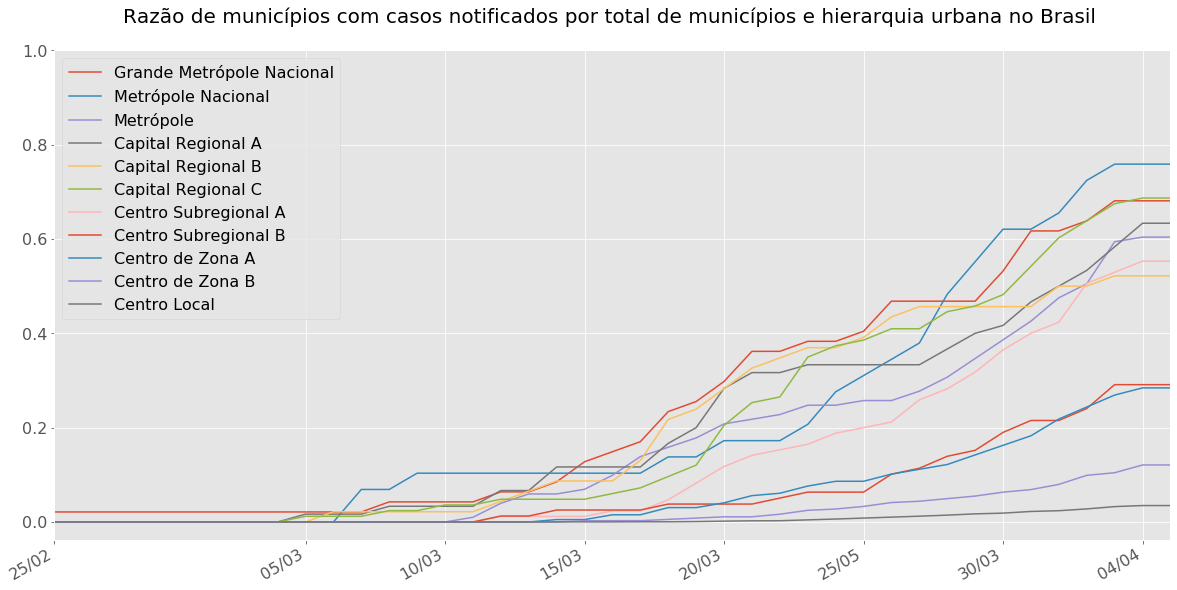

In [176]:
for coluna in ['Grande Metrópole Nacional', 'Metrópole Nacional', 'Metrópole','Capital Regional A', 'Capital Regional B', 'Capital Regional C','Centro Subregional A', 'Centro Subregional B','Centro de Zona A', 'Centro de Zona B', 'Centro Local']:
    df_para_plot2[coluna].plot()
plt.legend()
plt.title('Razão de municípios com casos notificados por total de municípios e hierarquia urbana no Brasil \n')

plt.xticks(['2020-02-25', '2020-03-05', '2020-03-10', '2020-03-15', '2020-03-20', '2020-03-25', '2020-03-30', '2020-04-04'], ['25/02', '05/03', '10/03', '15/03', '20/03', '25/05', '30/03', '04/04'])

plt.xlabel("")
plt. ylim(top=1)

plt.savefig('ritmos_hierarquia_urbana.png')

## Turismo

In [177]:
df_covid_19_br

,Unnamed: 0,cod_mun,municipio,estado,data,novos_casos,casos_total,hierarquia_urbana
0,0,3550308,São Paulo,SP,2020-02-25,1,1,Grande Metrópole Nacional
1,2,3550308,São Paulo,SP,2020-02-29,1,2,Grande Metrópole Nacional
2,4,3550308,São Paulo,SP,2020-03-04,1,3,Grande Metrópole Nacional
3,6,3550308,São Paulo,SP,2020-03-05,3,6,Grande Metrópole Nacional
4,7,3300407,Barra Mansa,RJ,2020-03-05,1,1,Capital Regional C
...,...,...,...,...,...,...,...,...
6070,6104,3303708,Paraíba do Sul,RJ,2020-04-05,0,2,Centro Local
6071,6105,3302858,Mesquita,RJ,2020-04-05,0,1,Centro Local
6072,6106,3303401,Nova Friburgo,RJ,2020-04-05,0,1,Centro Subregional A
6073,6107,42,NÃO ESPECIFICADA,SC,2020-04-05,0,23,NaN


In [178]:
dic_mapeamento_turismo = {}
for linha in df_fatores_geograficos.loc[:, ['cod_mun','turismo']].iterrows():
    dic_mapeamento_turismo[linha[1]['cod_mun']] = linha[1]['turismo']

In [179]:
df_covid_19_br['turismo'] = df_covid_19_br.cod_mun.map(dic_mapeamento_turismo)

In [180]:
df_covid_19_br.data = pd.to_datetime(df_covid_19_br.data)

In [181]:
df_para_plot_turismo = df_covid_19_br.pivot_table(index='data', columns='turismo', values='casos_total', aggfunc='count')

In [182]:
df_para_plot_turismo = df_para_plot_turismo.fillna(0)

In [183]:
df_para_plot_turismo.columns = ['0','1','2','3','4','5']

In [184]:
df_para_plot_turismo

,0,1,2,3,4,5
data,,,,,,
2020-02-25,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
2020-02-29,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
2020-03-04,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
2020-03-05,0.0000,0.0000,0.0000,1.0000,1.0000,1.0000
2020-03-06,0.0000,0.0000,0.0000,1.0000,2.0000,1.0000
2020-03-07,0.0000,0.0000,0.0000,1.0000,2.0000,3.0000
2020-03-08,0.0000,0.0000,1.0000,1.0000,3.0000,4.0000
2020-03-09,0.0000,0.0000,1.0000,1.0000,4.0000,4.0000
2020-03-10,0.0000,0.0000,2.0000,1.0000,4.0000,4.0000


In [185]:
df_para_plot_turismo2 = df_para_plot_turismo.copy()
for turismo, total in zip(['5','4','3','2','1','0'], [62, 257, 476, 1522, 377, 2876]):
    df_para_plot_turismo2[turismo] = df_para_plot_turismo2[turismo] / total
df_para_plot_turismo2

,0,1,2,3,4,5
data,,,,,,
2020-02-25,0.0000,0.0000,0.0000,0.0000,0.0000,0.0161
2020-02-29,0.0000,0.0000,0.0000,0.0000,0.0000,0.0161
2020-03-04,0.0000,0.0000,0.0000,0.0000,0.0000,0.0161
2020-03-05,0.0000,0.0000,0.0000,0.0021,0.0039,0.0161
2020-03-06,0.0000,0.0000,0.0000,0.0021,0.0078,0.0161
2020-03-07,0.0000,0.0000,0.0000,0.0021,0.0078,0.0484
2020-03-08,0.0000,0.0000,0.0007,0.0021,0.0117,0.0645
2020-03-09,0.0000,0.0000,0.0007,0.0021,0.0156,0.0645
2020-03-10,0.0000,0.0000,0.0013,0.0021,0.0156,0.0645


In [186]:
df_para_plot_turismo2.columns = ['Sem Classe', 'E', 'D','C','B', 'A']

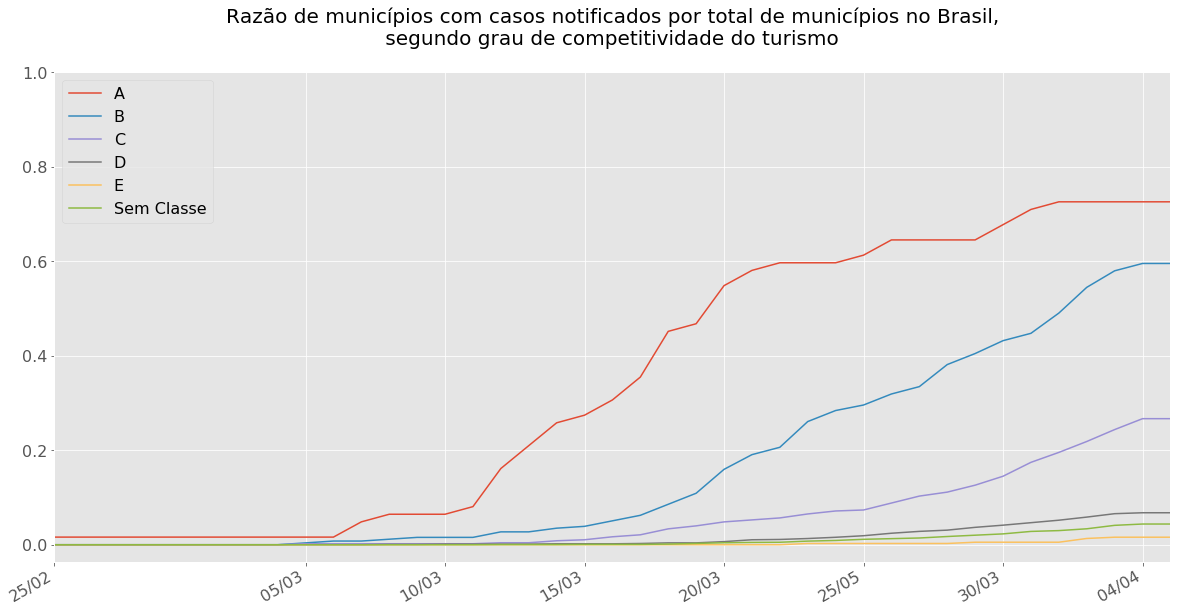

In [187]:
for coluna in ['A', 'B', 'C','D', 'E', 'Sem Classe']:
    df_para_plot_turismo2[coluna].plot()
plt.legend(loc='upper left')
plt.title('Razão de municípios com casos notificados por total de municípios no Brasil,\n segundo grau de competitividade do turismo \n')

plt.xticks(['2020-02-25', '2020-03-05', '2020-03-10', '2020-03-15', '2020-03-20', '2020-03-25', '2020-03-30', '2020-04-04'], ['25/02', '05/03', '10/03', '15/03', '20/03', '25/05', '30/03', '04/04'])

plt.xlabel("")
plt. ylim(top=1)

plt.savefig('ritmos_turismo.png')

## PIB

In [188]:
df_fatores_geograficos.columns

Index(['cod_mun', 'UF', 'Município', 'pop2019', 'pib2017milreais',
       'export_fob_2019', 'import_fob_2019', 'pip_per_capita17',
       'hierarquia_urbana07', 'hierarquia', 'voos_dom', 'voos_int',
       'indice_proximidade', 'indice_intermediacao', 'turismo',
       'peso_integracao_interna', 'peso_integracao_geral', 'classe_pop',
       'classe_pib', 'classe_capita', 'classe_exportacao', 'classe_importacao',
       'classe_voos_domesticos', 'classe_proximidade', 'dia2502', 'dia2602',
       'dia2702', 'dia2802', 'dia2902', 'dia0103', 'dia0203', 'dia0303',
       'dia0403', 'dia0503', 'dia0603', 'dia0703', 'dia0803', 'dia0903',
       'dia1003', 'dia1103', 'dia1203', 'dia1303', 'dia1403', 'dia1503',
       'dia1603', 'dia1703', 'dia1803', 'dia1903', 'dia2003', 'dia2103',
       'dia2203', 'dia2303', 'dia2403', 'dia2503', 'dia2603', 'dia2703',
       'dia2803', 'dia2903', 'dia3003', 'dia3103', 'dia0104', 'dia0204',
       'dia0304', 'dia0404', 'dia0504', 'data_primeiro_caso', 'data_

In [189]:
df_covid_19_br = df_covid_19_br[['cod_mun', 'municipio', 'estado', 'data', 'novos_casos','casos_total', 'hierarquia_urbana', 'turismo']]

In [190]:
df_covid_19_br

,cod_mun,municipio,estado,data,novos_casos,casos_total,hierarquia_urbana,turismo
0,3550308,São Paulo,SP,2020-02-25,1,1,Grande Metrópole Nacional,5.0000
1,3550308,São Paulo,SP,2020-02-29,1,2,Grande Metrópole Nacional,5.0000
2,3550308,São Paulo,SP,2020-03-04,1,3,Grande Metrópole Nacional,5.0000
3,3550308,São Paulo,SP,2020-03-05,3,6,Grande Metrópole Nacional,5.0000
4,3300407,Barra Mansa,RJ,2020-03-05,1,1,Capital Regional C,3.0000
...,...,...,...,...,...,...,...,...
6070,3303708,Paraíba do Sul,RJ,2020-04-05,0,2,Centro Local,3.0000
6071,3302858,Mesquita,RJ,2020-04-05,0,1,Centro Local,2.0000
6072,3303401,Nova Friburgo,RJ,2020-04-05,0,1,Centro Subregional A,4.0000
6073,42,NÃO ESPECIFICADA,SC,2020-04-05,0,23,NaN,nan


In [191]:
def gera_df_plot_dias_covid_por_fator(df_fatores, df_covid, col):
    """ 
    toma o dataframe de fatores geográficos para a COVID-19, com cod_mun no index, 
    e retorna um dataframe pronto para plotagem de evolução diária por fator.
    """

    dic_mapeamento = {}
    for linha in df_fatores.loc[:, ['cod_mun', col]].iterrows():
        dic_mapeamento[linha[1]['cod_mun']] = linha[1][col]

    df_covid[col] = df_covid.cod_mun.map(dic_mapeamento)
    
    df_covid.data = pd.to_datetime(df_covid.data)
    
    df_para_plot = df_covid.pivot_table(index='data', columns=col, values='casos_total', aggfunc='count')
    
    df_para_plot = df_para_plot.fillna(0)
    
    return df_para_plot

In [192]:
df_fatores_geograficos.columns

Index(['cod_mun', 'UF', 'Município', 'pop2019', 'pib2017milreais',
       'export_fob_2019', 'import_fob_2019', 'pip_per_capita17',
       'hierarquia_urbana07', 'hierarquia', 'voos_dom', 'voos_int',
       'indice_proximidade', 'indice_intermediacao', 'turismo',
       'peso_integracao_interna', 'peso_integracao_geral', 'classe_pop',
       'classe_pib', 'classe_capita', 'classe_exportacao', 'classe_importacao',
       'classe_voos_domesticos', 'classe_proximidade', 'dia2502', 'dia2602',
       'dia2702', 'dia2802', 'dia2902', 'dia0103', 'dia0203', 'dia0303',
       'dia0403', 'dia0503', 'dia0603', 'dia0703', 'dia0803', 'dia0903',
       'dia1003', 'dia1103', 'dia1203', 'dia1303', 'dia1403', 'dia1503',
       'dia1603', 'dia1703', 'dia1803', 'dia1903', 'dia2003', 'dia2103',
       'dia2203', 'dia2303', 'dia2403', 'dia2503', 'dia2603', 'dia2703',
       'dia2803', 'dia2903', 'dia3003', 'dia3103', 'dia0104', 'dia0204',
       'dia0304', 'dia0404', 'dia0504', 'data_primeiro_caso', 'data_

In [193]:
for linha in df_fatores_geograficos.loc[:, ['cod_mun', 'classe_pib']].iterrows():
    print(linha[1]['cod_mun'])

1100015
1100023
1100031
1100049
1100056
1100064
1100072
1100080
1100098
1100106
1100114
1100122
1100130
1100148
1100155
1100189
1100205
1100254
1100262
1100288
1100296
1100304
1100320
1100338
1100346
1100379
1100403
1100452
1100502
1100601
1100700
1100809
1100908
1100924
1100940
1101005
1101104
1101203
1101302
1101401
1101435
1101450
1101468
1101476
1101484
1101492
1101500
1101559
1101609
1101708
1101757
1101807
1200013
1200054
1200104
1200138
1200179
1200203
1200252
1200302
1200328
1200336
1200344
1200351
1200385
1200393
1200401
1200427
1200435
1200450
1200500
1200609
1200708
1200807
1300029
1300060
1300086
1300102
1300144
1300201
1300300
1300409
1300508
1300607
1300631
1300680
1300706
1300805
1300839
1300904
1301001
1301100
1301159
1301209
1301308
1301407
1301506
1301605
1301654
1301704
1301803
1301852
1301902
1301951
1302009
1302108
1302207
1302306
1302405
1302504
1302553
1302603
1302702
1302801
1302900
1303007
1303106
1303205
1303304
1303403
1303502
1303536
1303569
1303601
1303700


2514552
2514602
2514651
2514701
2514800
2514909
2515005
2515104
2515203
2515302
2515401
2515500
2515609
2515708
2515807
2515906
2515930
2515971
2516003
2516102
2516151
2516201
2516300
2516409
2516508
2516607
2516706
2516755
2516805
2516904
2517001
2517100
2517209
2517407
2600054
2600104
2600203
2600302
2600401
2600500
2600609
2600708
2600807
2600906
2601003
2601052
2601102
2601201
2601300
2601409
2601508
2601607
2601706
2601805
2601904
2602001
2602100
2602209
2602308
2602407
2602506
2602605
2602704
2602803
2602902
2603009
2603108
2603207
2603306
2603405
2603454
2603504
2603603
2603702
2603801
2603900
2603926
2604007
2604106
2604155
2604205
2604304
2604403
2604502
2604601
2604700
2604809
2604908
2605004
2605103
2605152
2605202
2605301
2605400
2605459
2605509
2605608
2605707
2605806
2605905
2606002
2606101
2606200
2606309
2606408
2606507
2606606
2606705
2606804
2606903
2607000
2607109
2607208
2607307
2607406
2607505
2607604
2607653
2607703
2607752
2607802
2607901
2607950
2608008
2608057


3156908
3157005
3157104
3157203
3157252
3157278
3157302
3157336
3157377
3157401
3157500
3157609
3157658
3157708
3157807
3157906
3158003
3158102
3158201
3158300
3158409
3158508
3158607
3158706
3158805
3158904
3158953
3159001
3159100
3159209
3159308
3159357
3159407
3159506
3159605
3159704
3159803
3159902
3160009
3160108
3160207
3160306
3160405
3160454
3160504
3160603
3160702
3160801
3160900
3160959
3161007
3161056
3161106
3161205
3161304
3161403
3161502
3161601
3161650
3161700
3161809
3161908
3162005
3162104
3162203
3162252
3162302
3162401
3162450
3162500
3162559
3162575
3162609
3162658
3162708
3162807
3162906
3162922
3162948
3162955
3163003
3163102
3163201
3163300
3163409
3163508
3163607
3163706
3163805
3163904
3164001
3164100
3164209
3164308
3164407
3164431
3164472
3164506
3164605
3164704
3164803
3164902
3165008
3165107
3165206
3165305
3165404
3165503
3165537
3165552
3165560
3165578
3165602
3165701
3165800
3165909
3166006
3166105
3166204
3166303
3166402
3166501
3166600
3166709
3166808


4219309
4219358
4219408
4219507
4219606
4219705
4219853
4220000
4300034
4300059
4300109
4300208
4300307
4300406
4300455
4300471
4300505
4300554
4300570
4300604
4300638
4300646
4300661
4300703
4300802
4300851
4300877
4300901
4301008
4301057
4301073
4301107
4301206
4301305
4301404
4301503
4301552
4301602
4301636
4301651
4301701
4301750
4301800
4301859
4301875
4301909
4301925
4301958
4302006
4302055
4302105
4302154
4302204
4302220
4302238
4302253
4302303
4302352
4302378
4302402
4302451
4302501
4302584
4302600
4302659
4302709
4302808
4302907
4303004
4303103
4303202
4303301
4303400
4303509
4303558
4303608
4303673
4303707
4303806
4303905
4304002
4304101
4304200
4304309
4304358
4304408
4304507
4304606
4304614
4304622
4304630
4304655
4304663
4304671
4304689
4304697
4304705
4304713
4304804
4304853
4304903
4304952
4305009
4305108
4305116
4305124
4305132
4305157
4305173
4305207
4305306
4305355
4305371
4305405
4305439
4305447
4305454
4305504
4305587
4305603
4305702
4305801
4305835
4305850
4305871


In [194]:
df_fatores_geograficos.columns

Index(['cod_mun', 'UF', 'Município', 'pop2019', 'pib2017milreais',
       'export_fob_2019', 'import_fob_2019', 'pip_per_capita17',
       'hierarquia_urbana07', 'hierarquia', 'voos_dom', 'voos_int',
       'indice_proximidade', 'indice_intermediacao', 'turismo',
       'peso_integracao_interna', 'peso_integracao_geral', 'classe_pop',
       'classe_pib', 'classe_capita', 'classe_exportacao', 'classe_importacao',
       'classe_voos_domesticos', 'classe_proximidade', 'dia2502', 'dia2602',
       'dia2702', 'dia2802', 'dia2902', 'dia0103', 'dia0203', 'dia0303',
       'dia0403', 'dia0503', 'dia0603', 'dia0703', 'dia0803', 'dia0903',
       'dia1003', 'dia1103', 'dia1203', 'dia1303', 'dia1403', 'dia1503',
       'dia1603', 'dia1703', 'dia1803', 'dia1903', 'dia2003', 'dia2103',
       'dia2203', 'dia2303', 'dia2403', 'dia2503', 'dia2603', 'dia2703',
       'dia2803', 'dia2903', 'dia3003', 'dia3103', 'dia0104', 'dia0204',
       'dia0304', 'dia0404', 'dia0504', 'data_primeiro_caso', 'data_

In [195]:
df_plot_evolucao_pib = gera_df_plot_dias_covid_por_fator(df_fatores=df_fatores_geograficos, df_covid=df_covid_19_br, col='classe_pib')

In [196]:
df_plot_evolucao_pib

classe_pib,acima de 20.000,até 50,de 1.000 a 5.000,de 10.000 a 20.000,de 100 a 500,de 5.000 a 10.000,de 50 a 100,de 500 a 1.000
data,,,,,,,,
2020-02-25,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-02-29,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-03-04,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-03-05,1.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000
2020-03-06,1.0000,0.0000,1.0000,2.0000,0.0000,0.0000,0.0000,0.0000
2020-03-07,3.0000,0.0000,1.0000,2.0000,0.0000,0.0000,0.0000,0.0000
2020-03-08,4.0000,0.0000,1.0000,2.0000,0.0000,2.0000,0.0000,0.0000
2020-03-09,5.0000,0.0000,1.0000,2.0000,0.0000,2.0000,0.0000,0.0000
2020-03-10,5.0000,0.0000,2.0000,2.0000,0.0000,2.0000,0.0000,0.0000


In [197]:
np.sort(df_plot_evolucao_pib.columns)

array(['acima de 20.000', 'até 50', 'de 1.000 a 5.000',
       'de 10.000 a 20.000', 'de 100 a 500', 'de 5.000 a 10.000',
       'de 50 a 100', 'de 500 a 1.000'], dtype=object)

In [198]:
np.sort(df_fatores_geograficos.classe_pib.unique())

array(['acima de 20.000', 'até 50', 'de 1.000 a 5.000',
       'de 10.000 a 20.000', 'de 100 a 500', 'de 5.000 a 10.000',
       'de 50 a 100', 'de 500 a 1.000'], dtype=object)

In [199]:
df_fatores_geograficos.classe_pib.value_counts()

de 100 a 500          2447
de 50 a 100           1109
até 50                 693
de 1.000 a 5.000       597
de 500 a 1.000         561
de 5.000 a 10.000       65
de 10.000 a 20.000      56
acima de 20.000         42
Name: classe_pib, dtype: int64

In [200]:
df_fatores_geograficos.classe_pib.value_counts().values

array([2447, 1109,  693,  597,  561,   65,   56,   42], dtype=int64)

In [201]:
df_plot_evolucao_pib2 = df_plot_evolucao_pib.copy()
for faixapib, total in zip(['acima de 20.000', 
                           'até 50', 
                           'de 1.000 a 5.000', 
                           'de 10.000 a 20.000', 
                           'de 100 a 500', 
                           'de 5.000 a 10.000', 
                           'de 50 a 100', 
                           'de 500 a 1.000'], [42, 693, 597, 56,  2447, 65, 1109, 561]):
    df_plot_evolucao_pib2[faixapib] = df_plot_evolucao_pib2[faixapib] / total
df_plot_evolucao_pib2

classe_pib,acima de 20.000,até 50,de 1.000 a 5.000,de 10.000 a 20.000,de 100 a 500,de 5.000 a 10.000,de 50 a 100,de 500 a 1.000
data,,,,,,,,
2020-02-25,0.0238,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-02-29,0.0238,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-03-04,0.0238,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-03-05,0.0238,0.0000,0.0017,0.0179,0.0000,0.0000,0.0000,0.0000
2020-03-06,0.0238,0.0000,0.0017,0.0357,0.0000,0.0000,0.0000,0.0000
2020-03-07,0.0714,0.0000,0.0017,0.0357,0.0000,0.0000,0.0000,0.0000
2020-03-08,0.0952,0.0000,0.0017,0.0357,0.0000,0.0308,0.0000,0.0000
2020-03-09,0.1190,0.0000,0.0017,0.0357,0.0000,0.0308,0.0000,0.0000
2020-03-10,0.1190,0.0000,0.0034,0.0357,0.0000,0.0308,0.0000,0.0000


In [202]:
df_plot_evolucao_pib2 = df_plot_evolucao_pib2[['até 50', 'de 50 a 100', 'de 100 a 500', 'de 500 a 1.000', 'de 1.000 a 5.000', 'de 5.000 a 10.000', 'de 10.000 a 20.000', 'acima de 20.000', ]]

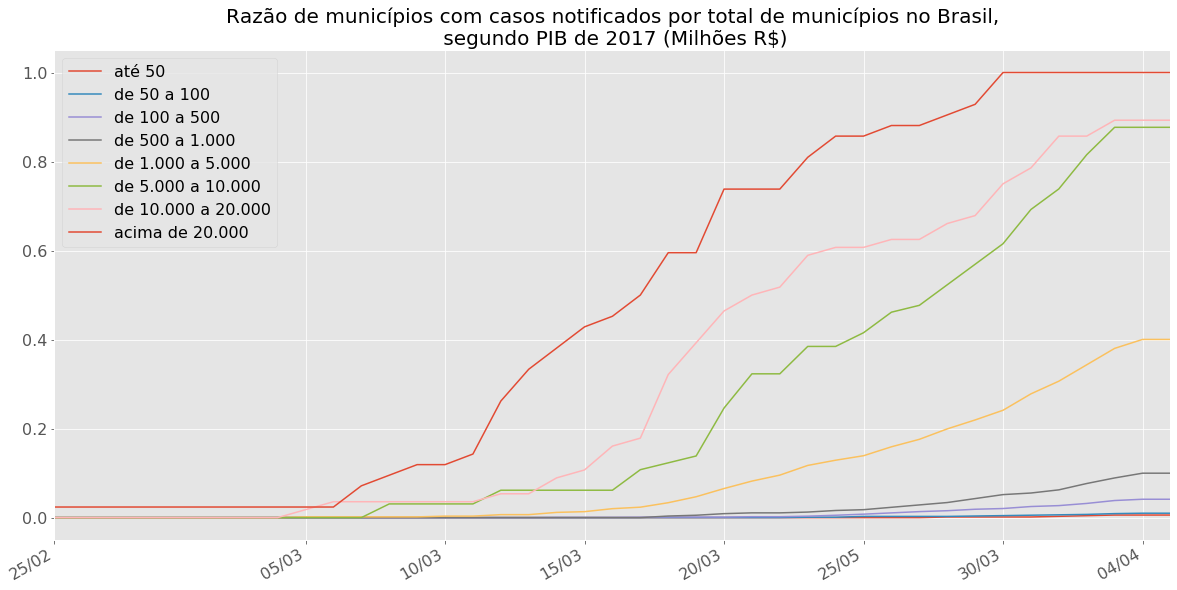

In [203]:
for coluna in df_plot_evolucao_pib2.columns:
    df_plot_evolucao_pib2[coluna].plot()
plt.legend()
plt.title('Razão de municípios com casos notificados por total de municípios no Brasil,\n segundo PIB de 2017 (Milhões R$)')

plt.xticks(['2020-02-25', '2020-03-05', '2020-03-10', '2020-03-15', '2020-03-20', '2020-03-25', '2020-03-30', '2020-04-04'], ['25/02', '05/03', '10/03', '15/03', '20/03', '25/05', '30/03', '04/04'])

plt.xlabel("")
plt. ylim()

plt.savefig('ritmos_pib.png')

## População

In [205]:
df_plot_evolucao_pop = gera_df_plot_dias_covid_por_fator(df_fatores=df_fatores_geograficos, df_covid=df_covid_19_br, col='classe_pop')

In [206]:
df_plot_evolucao_pop  = df_plot_evolucao_pop[['Até 20.000', 'Até 50.000', 'Até 100.000','Até 500.000','Até 1.000.000', 'Acima de 1.000.000']]

In [207]:
df_plot_evolucao_pop 

classe_pop,Até 20.000,Até 50.000,Até 100.000,Até 500.000,Até 1.000.000,Acima de 1.000.000
data,,,,,,
2020-02-25,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
2020-02-29,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
2020-03-04,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
2020-03-05,0.0000,0.0000,0.0000,2.0000,0.0000,1.0000
2020-03-06,0.0000,0.0000,0.0000,2.0000,1.0000,1.0000
2020-03-07,0.0000,0.0000,0.0000,2.0000,1.0000,3.0000
2020-03-08,0.0000,0.0000,0.0000,4.0000,1.0000,4.0000
2020-03-09,0.0000,0.0000,0.0000,4.0000,2.0000,4.0000
2020-03-10,0.0000,0.0000,1.0000,4.0000,2.0000,4.0000


In [208]:
df_fatores_geograficos.classe_pop.value_counts()

Até 20.000            3796
Até 50.000            1101
Até 100.000            349
Até 500.000            276
Até 1.000.000           31
Acima de 1.000.000      17
Name: classe_pop, dtype: int64

In [209]:
df_plot_evolucao_pop.columns

Index(['Até 20.000', 'Até 50.000', 'Até 100.000', 'Até 500.000',
       'Até 1.000.000', 'Acima de 1.000.000'],
      dtype='object', name='classe_pop')

In [210]:
df_plot_evolucao_pop2 = df_plot_evolucao_pop.copy()
for faixapop, total in zip(['Até 20.000', 
                            'Até 50.000', 
                            'Até 100.000', 
                            'Até 500.000',
                            'Até 1.000.000',
                            'Acima de 1.000.000'], [3796, 1101,  349,  276,   31,   17]):
    df_plot_evolucao_pop2[faixapop] = df_plot_evolucao_pop2[faixapop] / total
df_plot_evolucao_pop2

classe_pop,Até 20.000,Até 50.000,Até 100.000,Até 500.000,Até 1.000.000,Acima de 1.000.000
data,,,,,,
2020-02-25,0.0000,0.0000,0.0000,0.0000,0.0000,0.0588
2020-02-29,0.0000,0.0000,0.0000,0.0000,0.0000,0.0588
2020-03-04,0.0000,0.0000,0.0000,0.0000,0.0000,0.0588
2020-03-05,0.0000,0.0000,0.0000,0.0072,0.0000,0.0588
2020-03-06,0.0000,0.0000,0.0000,0.0072,0.0323,0.0588
2020-03-07,0.0000,0.0000,0.0000,0.0072,0.0323,0.1765
2020-03-08,0.0000,0.0000,0.0000,0.0145,0.0323,0.2353
2020-03-09,0.0000,0.0000,0.0000,0.0145,0.0645,0.2353
2020-03-10,0.0000,0.0000,0.0029,0.0145,0.0645,0.2353


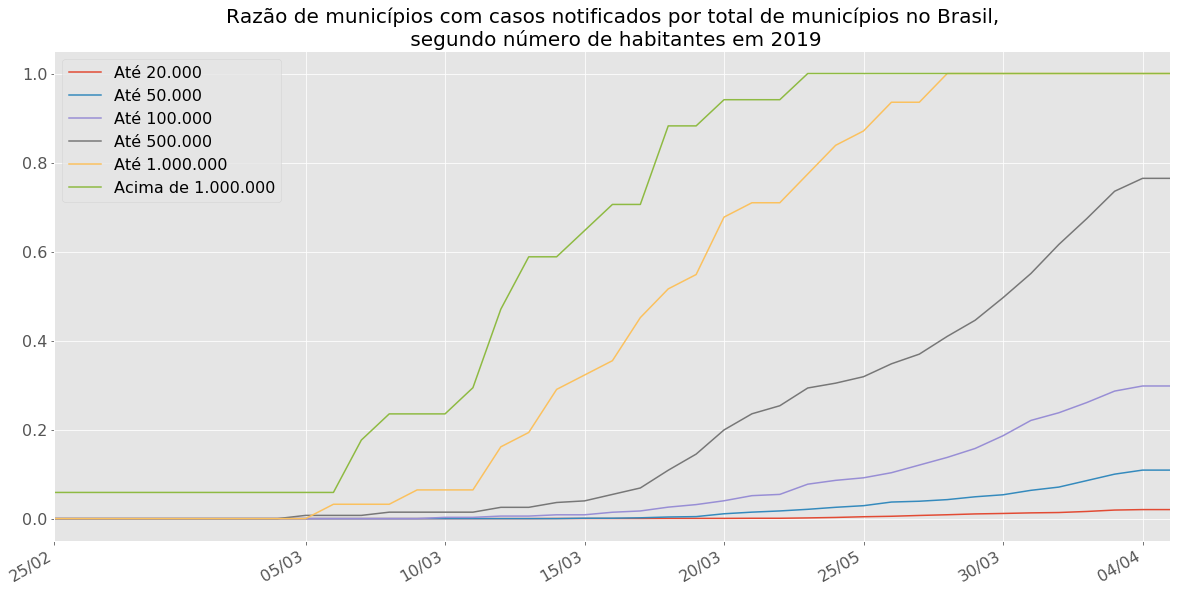

In [211]:
for coluna in df_plot_evolucao_pop2.columns:
    df_plot_evolucao_pop2[coluna].plot()
plt.legend()
plt.title('Razão de municípios com casos notificados por total de municípios no Brasil,\n segundo número de habitantes em 2019')

plt.xticks(['2020-02-25', '2020-03-05', '2020-03-10', '2020-03-15', '2020-03-20', '2020-03-25', '2020-03-30', '2020-04-04'], ['25/02', '05/03', '10/03', '15/03', '20/03', '25/05', '30/03', '04/04'])

plt.xlabel("")
plt. ylim()

plt.savefig('ritmos_pop.png')

In [212]:
df_fatores_geograficos.classe_exportacao.unique()

array(['de 50.000 a 200.000', 'de 20.000.000 a 50.000.000',
       'de 50.000.000 a 100.000.000', 'até 50.000', 'Sem exportações',
       'de 5.000.000 a 20.000.000', 'de 1.000.000 a 5.000.000',
       'de 100.000.000 a 500.000.000', 'de 500.000 a 1.000.000',
       'de 200.000 a 500.000', 'acima de 500.000.000'], dtype=object)

## PIB Percapita

In [213]:
df_plot_evolucao_pib_percapita = gera_df_plot_dias_covid_por_fator(df_fatores=df_fatores_geograficos, df_covid=df_covid_19_br, col='classe_capita')

In [214]:
df_fatores_geograficos

,cod_mun,UF,Município,pop2019,pib2017milreais,export_fob_2019,import_fob_2019,pip_per_capita17,hierarquia_urbana07,hierarquia,...,dia3003,dia3103,dia0104,dia0204,dia0304,dia0404,dia0504,data_primeiro_caso,data_padrao,dias_contaminação_referencia
0,1100015,RO,Alta Floresta D'Oeste,22945,498864,198695,13294,1961,Centro Local,1,...,0,0,0,0,0,0,0,NaN,24/02/2020,nan
1,1100023,RO,Ariquemes,107863,2296074,38002769,738809,2139,Centro Subregional B,4,...,0,0,0,0,0,0,0,10/04/2020,24/02/2020,46.0000
2,1100031,RO,Cabixi,5312,138894,137660,0,2232,Centro Local,1,...,0,0,0,0,0,0,0,NaN,24/02/2020,nan
3,1100049,RO,Cacoal,85359,2127523,20514957,53854,2404,Centro Subregional B,4,...,0,0,0,0,0,0,0,NaN,24/02/2020,nan
4,1100056,RO,Cerejeiras,16323,448524,97838806,59259,2501,Centro de Zona B,2,...,0,0,0,0,0,0,0,NaN,24/02/2020,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,5222005,GO,Vianópolis,13863,395787,0,0,2894,Centro Local,1,...,0,0,0,0,0,0,0,07/04/2020,24/02/2020,43.0000
5566,5222054,GO,Vicentinópolis,8743,350765,6518444,0,4177,Centro Local,1,...,0,0,0,0,0,0,0,NaN,24/02/2020,nan
5567,5222203,GO,Vila Boa,6171,137500,0,0,2399,Centro Local,1,...,0,0,0,0,0,0,0,NaN,24/02/2020,nan
5568,5222302,GO,Vila Propício,5821,182175,0,0,3202,Centro Local,1,...,0,0,0,0,0,0,0,NaN,24/02/2020,nan


In [215]:
df_plot_evolucao_pib_percapita = df_plot_evolucao_pib_percapita[[
    'até 1.000', 'de 1.000 a 2.000', 'de 2.000 a 3.000', 'de 3.000 a 4.000',
    'de 4.000 a 5.000', 'de 5.000 a 10.000', 'Acima de 10.000'
]]

In [216]:
df_plot_evolucao_pib_percapita

classe_capita,até 1.000,de 1.000 a 2.000,de 2.000 a 3.000,de 3.000 a 4.000,de 4.000 a 5.000,de 5.000 a 10.000,Acima de 10.000
data,,,,,,,
2020-02-25,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
2020-02-29,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
2020-03-04,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
2020-03-05,0.0000,0.0000,2.0000,0.0000,0.0000,1.0000,0.0000
2020-03-06,0.0000,0.0000,3.0000,0.0000,0.0000,1.0000,0.0000
2020-03-07,0.0000,0.0000,3.0000,0.0000,0.0000,3.0000,0.0000
2020-03-08,0.0000,0.0000,5.0000,0.0000,0.0000,4.0000,0.0000
2020-03-09,0.0000,0.0000,5.0000,0.0000,0.0000,5.0000,0.0000
2020-03-10,0.0000,0.0000,5.0000,0.0000,1.0000,5.0000,0.0000


In [217]:
df_fatores_geograficos.classe_capita.value_counts()

de 1.000 a 2.000     1748
até 1.000            1541
de 2.000 a 3.000     1126
de 3.000 a 4.000      549
de 4.000 a 5.000      277
de 5.000 a 10.000     271
Acima de 10.000        58
Name: classe_capita, dtype: int64

In [220]:
df_plot_evolucao_pib_percapita.columns = ['até 10.000', 'de 10.000 a 20.000', 'de 20.000 a 30.000', 'de 30.000 a 40.000',
       'de 40.000 a 50.000', 'de 50.000 a 100.000', 'Acima de 100.000']

In [221]:
df_plot_evolucao_pib_percapita2 = df_plot_evolucao_pib_percapita.copy()
for faixapibcapita, total in zip(['até 10.000', 
                                  'de 10.000 a 20.000',
                                  'de 20.000 a 30.000', 
                                  'de 30.000 a 40.000',
                                  'de 40.000 a 50.000',
                                  'de 50.000 a 100.000', 
                                  'Acima de 100.000'], [1541, 1748, 1126, 549, 277, 271, 58]):
    df_plot_evolucao_pib_percapita2[faixapibcapita] = df_plot_evolucao_pib_percapita2[faixapibcapita] / total
df_plot_evolucao_pib_percapita2

,até 10.000,de 10.000 a 20.000,de 20.000 a 30.000,de 30.000 a 40.000,de 40.000 a 50.000,de 50.000 a 100.000,Acima de 100.000
data,,,,,,,
2020-02-25,0.0000,0.0000,0.0000,0.0000,0.0000,0.0037,0.0000
2020-02-29,0.0000,0.0000,0.0000,0.0000,0.0000,0.0037,0.0000
2020-03-04,0.0000,0.0000,0.0000,0.0000,0.0000,0.0037,0.0000
2020-03-05,0.0000,0.0000,0.0018,0.0000,0.0000,0.0037,0.0000
2020-03-06,0.0000,0.0000,0.0027,0.0000,0.0000,0.0037,0.0000
2020-03-07,0.0000,0.0000,0.0027,0.0000,0.0000,0.0111,0.0000
2020-03-08,0.0000,0.0000,0.0044,0.0000,0.0000,0.0148,0.0000
2020-03-09,0.0000,0.0000,0.0044,0.0000,0.0000,0.0185,0.0000
2020-03-10,0.0000,0.0000,0.0044,0.0000,0.0036,0.0185,0.0000


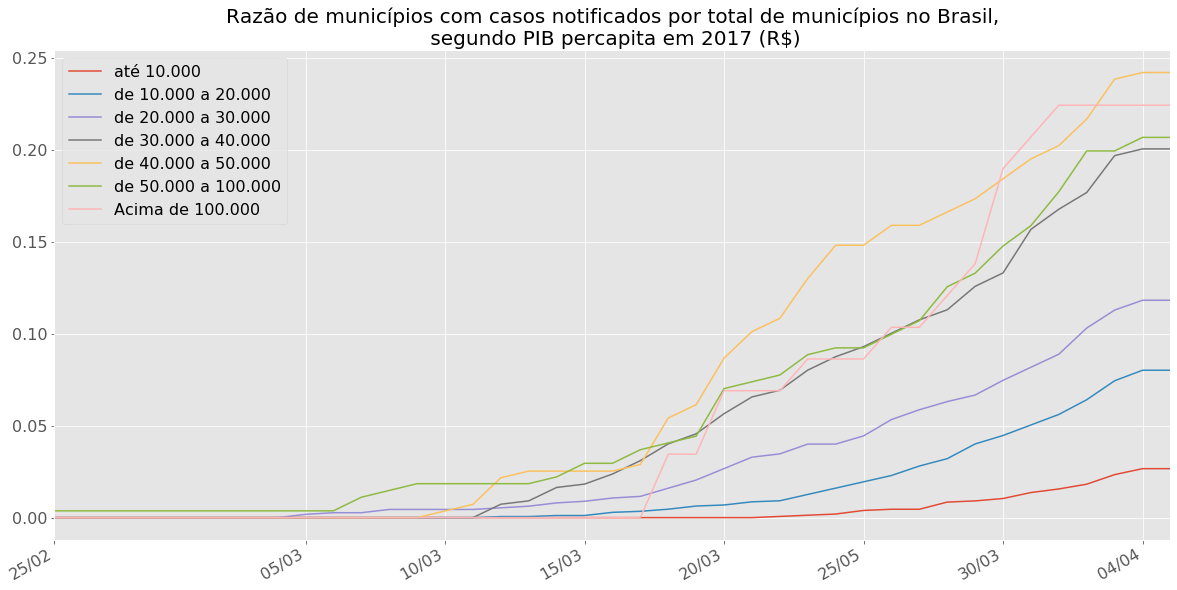

In [223]:
for coluna in df_plot_evolucao_pib_percapita2.columns:
    df_plot_evolucao_pib_percapita2[coluna].plot()
plt.legend(loc='upper left')
plt.title('Razão de municípios com casos notificados por total de municípios no Brasil,\n segundo PIB percapita em 2017 (R$)')

plt.xticks(['2020-02-25', '2020-03-05', '2020-03-10', '2020-03-15', '2020-03-20', '2020-03-25', '2020-03-30', '2020-04-04'], ['25/02', '05/03', '10/03', '15/03', '20/03', '25/05', '30/03', '04/04'])

plt.xlabel("")
# plt. ylim(top=1)

plt.savefig('ritmos_pib_percapita.png')

## Exportação

In [225]:
df_plot_evolucao_exportacao = gera_df_plot_dias_covid_por_fator(df_fatores=df_fatores_geograficos, df_covid=df_covid_19_br, col='classe_exportacao')

In [226]:
df_plot_evolucao_exportacao = df_plot_evolucao_exportacao[[
    'Sem exportações','até 50.000', 'de 50.000 a 200.000', 
    'de 200.000 a 500.000', 'de 500.000 a 1.000.000',
    'de 1.000.000 a 5.000.000', 'de 5.000.000 a 20.000.000',
    'de 20.000.000 a 50.000.000', 'de 50.000.000 a 100.000.000', 
    'de 100.000.000 a 500.000.000','acima de 500.000.000'
]]

In [227]:
df_plot_evolucao_exportacao

classe_exportacao,Sem exportações,até 50.000,de 50.000 a 200.000,de 200.000 a 500.000,de 500.000 a 1.000.000,de 1.000.000 a 5.000.000,de 5.000.000 a 20.000.000,de 20.000.000 a 50.000.000,de 50.000.000 a 100.000.000,de 100.000.000 a 500.000.000,acima de 500.000.000
data,,,,,,,,,,,
2020-02-25,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
2020-02-29,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
2020-03-04,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
2020-03-05,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,2.0000
2020-03-06,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,2.0000
2020-03-07,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,2.0000,0.0000,3.0000
2020-03-08,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.0000,2.0000,1.0000,3.0000
2020-03-09,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.0000,2.0000,1.0000,4.0000
2020-03-10,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.0000,3.0000,1.0000,4.0000


In [228]:
df_fatores_geograficos.classe_exportacao.value_counts()

Sem exportações                 3374
de 5.000.000 a 20.000.000        347
de 1.000.000 a 5.000.000         340
até 50.000                       274
de 20.000.000 a 50.000.000       237
de 100.000.000 a 500.000.000     232
de 50.000 a 200.000              179
de 50.000.000 a 100.000.000      177
de 200.000 a 500.000             161
de 500.000 a 1.000.000           156
acima de 500.000.000              93
Name: classe_exportacao, dtype: int64

In [229]:
df_plot_evolucao_exportacao.columns

Index(['Sem exportações', 'até 50.000', 'de 50.000 a 200.000',
       'de 200.000 a 500.000', 'de 500.000 a 1.000.000',
       'de 1.000.000 a 5.000.000', 'de 5.000.000 a 20.000.000',
       'de 20.000.000 a 50.000.000', 'de 50.000.000 a 100.000.000',
       'de 100.000.000 a 500.000.000', 'acima de 500.000.000'],
      dtype='object', name='classe_exportacao')

In [230]:
df_plot_evolucao_exportacao2 = df_plot_evolucao_exportacao.copy()
for faixa_export, total in zip([
    'Sem exportações','até 50.000', 'de 50.000 a 200.000', 
    'de 200.000 a 500.000', 'de 500.000 a 1.000.000',
    'de 1.000.000 a 5.000.000', 'de 5.000.000 a 20.000.000',
    'de 20.000.000 a 50.000.000', 'de 50.000.000 a 100.000.000', 
    'de 100.000.000 a 500.000.000','acima de 500.000.000'
], [3374, 274, 179, 161, 177, 340, 347, 237, 177, 232, 93]):
    df_plot_evolucao_exportacao2[faixa_export] = df_plot_evolucao_exportacao2[faixa_export] / total
df_plot_evolucao_exportacao2

classe_exportacao,Sem exportações,até 50.000,de 50.000 a 200.000,de 200.000 a 500.000,de 500.000 a 1.000.000,de 1.000.000 a 5.000.000,de 5.000.000 a 20.000.000,de 20.000.000 a 50.000.000,de 50.000.000 a 100.000.000,de 100.000.000 a 500.000.000,acima de 500.000.000
data,,,,,,,,,,,
2020-02-25,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0108
2020-02-29,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0108
2020-03-04,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0108
2020-03-05,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0042,0.0000,0.0000,0.0215
2020-03-06,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0042,0.0056,0.0000,0.0215
2020-03-07,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0042,0.0113,0.0000,0.0323
2020-03-08,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0127,0.0113,0.0043,0.0323
2020-03-09,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0127,0.0113,0.0043,0.0430
2020-03-10,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0127,0.0169,0.0043,0.0430


In [ ]:
for coluna in df_plot_evolucao_exportacao2.columns:
    df_plot_evolucao_exportacao2[coluna].plot()
plt.legend(loc='upper left')
plt.title('Razão de municípios com casos notificados por total de municípios no Brasil,\n segundo Exportações em 2019 (U$FOB) \n')

plt.xticks(['2020-02-25', '2020-03-05', '2020-03-10', '2020-03-15', '2020-03-20', '2020-03-25', '2020-03-30', '2020-04-04'], ['25/02', '05/03', '10/03', '15/03', '20/03', '25/05', '30/03', '04/04'])

plt.xlabel("")
plt. ylim(top=1)

plt.savefig('ritmos_exportacao.png')

In [ ]:
df_fatores_geograficos.classe_importacao.unique()

## Importação

In [231]:
df_plot_evolucao_importacao = gera_df_plot_dias_covid_por_fator(df_fatores=df_fatores_geograficos, df_covid=df_covid_19_br, col='classe_importacao')

In [232]:
df_plot_evolucao_importacao = df_plot_evolucao_importacao[[
    'sem importação','até 50.000', 'de 50.000 até 100.000', 
    'de 100.000 até 500.000', 'de 500.000 até 1.000.000',
    'de 1.000.000 até 5.000.000', 'de 5.000.000 até 10.000.000',
    'de 10.000.000 até 50.000.000', 'de 50.000.000 até 200.000.000', 
    'de 2000.000 até 500.000.000','acima de 500.000.000'
]]

In [233]:
df_plot_evolucao_importacao

classe_importacao,sem importação,até 50.000,de 50.000 até 100.000,de 100.000 até 500.000,de 500.000 até 1.000.000,de 1.000.000 até 5.000.000,de 5.000.000 até 10.000.000,de 10.000.000 até 50.000.000,de 50.000.000 até 200.000.000,de 2000.000 até 500.000.000,acima de 500.000.000
data,,,,,,,,,,,
2020-02-25,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
2020-02-29,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
2020-03-04,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
2020-03-05,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,2.0000
2020-03-06,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,2.0000
2020-03-07,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,4.0000
2020-03-08,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,1.0000,2.0000,4.0000
2020-03-09,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,2.0000,2.0000,4.0000
2020-03-10,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,2.0000,2.0000,2.0000,4.0000


In [234]:
df_fatores_geograficos.classe_importacao.value_counts()

sem importação                   3548
até 50.000                        420
de 1.000.000 até 5.000.000        364
de 100.000 até 500.000            283
de 10.000.000 até 50.000.000      264
de 5.000.000 até 10.000.000       163
de 500.000 até 1.000.000          140
de 50.000.000 até 200.000.000     134
de 50.000 até 100.000             115
acima de 500.000.000               75
de 2000.000 até 500.000.000        64
Name: classe_importacao, dtype: int64

In [235]:
df_plot_evolucao_importacao.columns

Index(['sem importação', 'até 50.000', 'de 50.000 até 100.000',
       'de 100.000 até 500.000', 'de 500.000 até 1.000.000',
       'de 1.000.000 até 5.000.000', 'de 5.000.000 até 10.000.000',
       'de 10.000.000 até 50.000.000', 'de 50.000.000 até 200.000.000',
       'de 2000.000 até 500.000.000', 'acima de 500.000.000'],
      dtype='object', name='classe_importacao')

In [236]:
df_plot_evolucao_importacao2 = df_plot_evolucao_importacao.copy()
for faixa_import, total in zip([
    'sem importação','até 50.000', 'de 50.000 até 100.000', 
    'de 100.000 até 500.000', 'de 500.000 até 1.000.000',
    'de 1.000.000 até 5.000.000', 'de 5.000.000 até 10.000.000',
    'de 10.000.000 até 50.000.000', 'de 50.000.000 até 200.000.000', 
    'de 2000.000 até 500.000.000','acima de 500.000.000'
], [3548, 420, 115, 283, 140, 364, 163, 264, 134, 64, 75]):
    df_plot_evolucao_importacao2[faixa_import] = df_plot_evolucao_importacao2[faixa_import] / total
df_plot_evolucao_importacao2

classe_importacao,sem importação,até 50.000,de 50.000 até 100.000,de 100.000 até 500.000,de 500.000 até 1.000.000,de 1.000.000 até 5.000.000,de 5.000.000 até 10.000.000,de 10.000.000 até 50.000.000,de 50.000.000 até 200.000.000,de 2000.000 até 500.000.000,acima de 500.000.000
data,,,,,,,,,,,
2020-02-25,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0133
2020-02-29,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0133
2020-03-04,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0133
2020-03-05,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0061,0.0000,0.0000,0.0000,0.0267
2020-03-06,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0061,0.0000,0.0075,0.0000,0.0267
2020-03-07,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0061,0.0000,0.0075,0.0000,0.0533
2020-03-08,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0061,0.0038,0.0075,0.0312,0.0533
2020-03-09,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0061,0.0038,0.0149,0.0312,0.0533
2020-03-10,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0061,0.0076,0.0149,0.0312,0.0533


In [ ]:
for coluna in df_plot_evolucao_importacao2.columns:
    df_plot_evolucao_importacao2[coluna].plot()
plt.legend(loc='upper left')
plt.title('Razão de municípios com casos notificados por total de municípios no Brasil,\n segundo importações em 2019 (U$FOB) \n')

plt.xticks(['2020-02-25', '2020-03-05', '2020-03-10', '2020-03-15', '2020-03-20', '2020-03-25', '2020-03-30', '2020-04-04'], ['25/02', '05/03', '10/03', '15/03', '20/03', '25/05', '30/03', '04/04'])

plt.xlabel("")
plt. ylim(top =1)

plt.savefig('ritmos_importacoes.png')

In [ ]:
df_fatores_geograficos.columns

## Índice de proximidade rodoviária/hidroviária

In [237]:
df_fatores_geograficos.classe_proximidade.unique()

array(['0,30 a 0,35', '0,40 a 0,45', '0,20 a 0,25', '0', '0,25 a 0,30',
       '0,35 a 0,40', 'acima de 0,45'], dtype=object)

In [238]:
df_plot_evolucao_proximidade = gera_df_plot_dias_covid_por_fator(df_fatores=df_fatores_geograficos, df_covid=df_covid_19_br, col='classe_proximidade')

In [239]:
df_plot_evolucao_proximidade = df_plot_evolucao_proximidade[[
    '0', '0,20 a 0,25', '0,25 a 0,30', '0,30 a 0,35',
    '0,35 a 0,40','0,40 a 0,45','acima de 0,45'
]]

In [240]:
df_plot_evolucao_proximidade

classe_proximidade,0,"0,20 a 0,25","0,25 a 0,30","0,30 a 0,35","0,35 a 0,40","0,40 a 0,45","acima de 0,45"
data,,,,,,,
2020-02-25,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
2020-02-29,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
2020-03-04,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
2020-03-05,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,1.0000
2020-03-06,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,2.0000
2020-03-07,0.0000,0.0000,0.0000,0.0000,2.0000,0.0000,4.0000
2020-03-08,0.0000,0.0000,1.0000,0.0000,3.0000,1.0000,4.0000
2020-03-09,0.0000,0.0000,1.0000,0.0000,4.0000,1.0000,4.0000
2020-03-10,0.0000,0.0000,1.0000,1.0000,4.0000,1.0000,4.0000


In [241]:
df_fatores_geograficos.classe_proximidade.value_counts()

0,30 a 0,35      2285
0,25 a 0,30      1382
0,35 a 0,40      1332
0,40 a 0,45       189
0                 184
0,20 a 0,25       183
acima de 0,45      15
Name: classe_proximidade, dtype: int64

In [242]:
df_plot_evolucao_proximidade.columns

Index(['0', '0,20 a 0,25', '0,25 a 0,30', '0,30 a 0,35', '0,35 a 0,40',
       '0,40 a 0,45', 'acima de 0,45'],
      dtype='object', name='classe_proximidade')

In [243]:
df_plot_evolucao_proximidade2 = df_plot_evolucao_proximidade.copy()
for faixa_proximidade, total in zip([
    '0', '0,20 a 0,25', '0,25 a 0,30', '0,30 a 0,35',
    '0,35 a 0,40','0,40 a 0,45','acima de 0,45'
], [184, 183, 1382, 2285, 1332, 189, 15]):
    df_plot_evolucao_proximidade2[faixa_proximidade] = df_plot_evolucao_proximidade2[faixa_proximidade] / total
df_plot_evolucao_proximidade2

classe_proximidade,0,"0,20 a 0,25","0,25 a 0,30","0,30 a 0,35","0,35 a 0,40","0,40 a 0,45","acima de 0,45"
data,,,,,,,
2020-02-25,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0667
2020-02-29,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0667
2020-03-04,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0667
2020-03-05,0.0000,0.0000,0.0000,0.0000,0.0015,0.0000,0.0667
2020-03-06,0.0000,0.0000,0.0000,0.0000,0.0015,0.0000,0.1333
2020-03-07,0.0000,0.0000,0.0000,0.0000,0.0015,0.0000,0.2667
2020-03-08,0.0000,0.0000,0.0007,0.0000,0.0023,0.0053,0.2667
2020-03-09,0.0000,0.0000,0.0007,0.0000,0.0030,0.0053,0.2667
2020-03-10,0.0000,0.0000,0.0007,0.0004,0.0030,0.0053,0.2667


In [ ]:
for coluna in df_plot_evolucao_proximidade2.columns:
    df_plot_evolucao_proximidade2[coluna].plot()
plt.legend(loc='upper left')
plt.title('Razão de municípios com casos notificados por total de municípios no Brasil,\n segundo índice de proximidade rodoviária/hidroviária')

plt.xticks(['2020-02-25', '2020-03-05', '2020-03-10', '2020-03-15', '2020-03-20', '2020-03-25', '2020-03-30', '2020-04-04'], ['25/02', '05/03', '10/03', '15/03', '20/03', '25/05', '30/03', '04/04'])

plt.xlabel("")
plt. ylim()

plt.savefig('ritmos_exportacao.png')

In [ ]:
df_fatores_geograficos.classe_voos_domesticos.unique()

In [ ]:
df_fatores_geograficos.columns

## Voos Domésticos

In [ ]:
df_plot_evolucao_voos_domesticos = gera_df_plot_dias_covid_por_fator(df_fatores=df_fatores_geograficos, df_covid=df_covid_19_br, col='classe_voos_domesticos', uf=None)

In [ ]:
df_plot_evolucao_voos_domesticos = df_plot_evolucao_voos_domesticos[[
    'sem voos', 'até 20', 'até 50', 'de 50 até 200',
    'de 200 até 1.000', 'acima de 1.000'
]]

In [ ]:
df_plot_evolucao_voos_domesticos.columns = [
    'sem voos', 'até 20', 'de 20 até 50', 'de 50 até 200',
    'de 200 até 1.000', 'acima de 1.000'
]

In [ ]:
df_plot_evolucao_voos_domesticos

In [ ]:
df_fatores_geograficos.classe_voos_domesticos.value_counts()

In [ ]:
df_plot_evolucao_voos_domesticos.columns

In [ ]:
df_plot_evolucao_voos_domesticos2 = df_plot_evolucao_voos_domesticos.copy()
for faixa_voos_dom, total in zip([
    'sem voos', 'até 20', 'de 20 até 50', 'de 50 até 200',
    'de 200 até 1.000', 'acima de 1.000'
], [5401, 63, 33, 38, 20, 15]):
    df_plot_evolucao_voos_domesticos2[faixa_voos_dom] = df_plot_evolucao_voos_domesticos2[faixa_voos_dom] / total
df_plot_evolucao_voos_domesticos2

In [ ]:
for coluna in df_plot_evolucao_voos_domesticos2.columns:
    df_plot_evolucao_voos_domesticos2[coluna].plot()
plt.legend(loc='upper left')
plt.title('Razão de municípios com casos notificados por total de municípios no Brasil,\n segundo número de voos domésticos em fevereiro de 2020')

plt.xticks(['2020-02-25', '2020-03-05', '2020-03-10', '2020-03-15', '2020-03-20', '2020-03-25', '2020-03-30', '2020-04-04'], ['25/02', '05/03', '10/03', '15/03', '20/03', '25/05', '30/03', '04/04'])

plt.xlabel("")
plt. ylim()

plt.savefig('ritmos_voos_domesticos.png')

In [ ]:
df_para_plot_pr = df_covid_19_br[df_covid_19_br['estado'] == 'PR'].pivot_table(index='data', columns='hierarquia_urbana', values='casos_total', aggfunc='count')

In [ ]:
df_para_plot_pr = df_para_plot_pr.fillna(0)

In [ ]:
df_para_plot_pr

In [ ]:
df_para_plot_pr = df_para_plot_pr[['Metrópole','Capital Regional B', 'Capital Regional C','Centro Subregional A', 'Centro Subregional B','Centro de Zona A', 'Centro de Zona B', 'Centro Local']]

In [ ]:
df_para_plot_pr2 = df_para_plot_pr.copy()
for hierarquia, total in zip(['Metrópole','Capital Regional B', 'Capital Regional C','Centro Subregional A', 'Centro Subregional B','Centro de Zona A', 'Centro de Zona B', 'Centro Local'], [47, 29, 101, 60, 46, 83, 85, 79, 197, 364, 4479]):
    df_para_plot_pr2[hierarquia] = df_para_plot_pr2[hierarquia] / total
df_para_plot2

In [ ]:
plt.legend?

In [ ]:
for coluna in ['Metrópole','Capital Regional B', 'Capital Regional C','Centro Subregional A', 'Centro Subregional B','Centro de Zona A', 'Centro de Zona B', 'Centro Local']:
    df_para_plot2[coluna].plot()
plt.legend(loc='upper left')


plt.title('Razão de municípios com casos notificados por total de municípios no Paraná')
plt.xticks(['2020-02-25', '2020-03-05', '2020-03-10', '2020-03-15', '2020-03-20', '2020-03-25', '2020-03-30', '2020-04-04'], ['25/02', '05/03', '10/03', '15/03', '20/03', '25/05', '30/03', '04/04'])
plt.xlabel("")


plt.ylim(top=1)
plt.savefig('ritmos_pr.png')

In [ ]:
filter_len_cod_mun = df_covid_19_br.cod_mun.astype('str').str.len() == 2


df_covid_19_br = df_covid_19_br[~filter_len_cod_mun]

In [ ]:
df_covid_19_br.info()

In [ ]:
df_covid_19_br.data = pd.to_datetime(df_covid_19_br.data)

In [ ]:
df_covid_19_br.plot('data', 'casos_total')

In [ ]:
pd.to_datetime(df_covid_19_br.data)

In [ ]:
filtro_dias_hierarquia = (df_fatores_geograficos.dias_contaminação_referencia >= 0) & (df_fatores_geograficos.hierarquia > 0)
filtro_dias_sem_hierarquia = (df_fatores_geograficos.dias_contaminação_referencia >= 0) & (df_fatores_geograficos.hierarquia == 0)


fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(20,8))

color_map = plt.cm.get_cmap('magma')
color_map = color_map.reversed()


scatter = plt.scatter(c=df_fatores_geograficos['hierarquia'][filtro_dias_sem_hierarquia], 
            x=df_fatores_geograficos.dias_contaminação_referencia[filtro_dias_sem_hierarquia],
            y=np.log(df_fatores_geograficos.pop2019[filtro_dias_sem_hierarquia]),
            alpha=0.9,
            s= 300);


ax.set_title('Municípios Brasileiros segundo momento do primeiro Caso de COVID-19, população e hierarquia urbana \n')
teste = plt.colorbar(ticks=[0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10,  11])
# teste.set_label('Hierarquia Urbana', rotation=270)
teste.ax.set_yticklabels(['Sem Classificação','Centro Local', 'Centro de Zona B', 'Centro de Zona A', 'Capital Sub-regional B', 'Capital Sub-regional A', 'Capital Regional C', 'Capital Regional B', 'Capital Regional A', 'Metrópole', 'Metrópole Nacional', 'Grande Metrópole Nacional'])  # horizontal colorbar

plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('primeira notificação (dias a partir de 25 de fevereiro de 2020)')
plt.ylabel('População em 2019 (escala logarítmica)');
plt.xlim(left=0)
plt.ylim(top=17)

plt.savefig('covid.png')
#lgnd = plt.legend(handles=handles, loc="lower left", scatterpoints=1)

#legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")
#lgnd.legendHandles[0]._sizes = [30]
#lgnd.legendHandles[1]._sizes = [30]

In [ ]:
filtro_dias = df_fatores_geograficos.dias_contaminação_referencia >= 0

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(20,8))

color_map = plt.cm.get_cmap('magma')
color_map = color_map.reversed()

scatter = plt.scatter(c=df_fatores_geograficos['hierarquia'][filtro_dias], 
            x=df_fatores_geograficos.dias_contaminação_referencia[filtro_dias],
            y=np.log(df_fatores_geograficos.pop2019[filtro_dias]),
            alpha=0.9,
            cmap=color_map,
            s= 300);

ax.set_title('Municípios Brasileiros segundo momento do primeiro Caso de COVID-19, população e hierarquia urbana \n')
teste = plt.colorbar(ticks=[0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10,  11])
# teste.set_label('Hierarquia Urbana', rotation=270)
teste.ax.set_yticklabels(['Sem Classificação','Centro Local', 'Centro de Zona B', 'Centro de Zona A', 'Capital Sub-regional B', 'Capital Sub-regional A', 'Capital Regional C', 'Capital Regional B', 'Capital Regional A', 'Metrópole', 'Metrópole Nacional', 'Grande Metrópole Nacional'])  # horizontal colorbar

plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('primeira notificação (dias a partir de 25 de fevereiro de 2020)')
plt.ylabel('População em 2019 (escala logarítmica)');


plt.savefig('covid.png')
#lgnd = plt.legend(handles=handles, loc="lower left", scatterpoints=1)

#legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")
#lgnd.legendHandles[0]._sizes = [30]
#lgnd.legendHandles[1]._sizes = [30]

In [ ]:
df_fatores_geograficos.columns

In [ ]:
df_fatores_geograficos[df_fatores_geograficos['dia0504'] >0][['pib2017milreais','dia0504']].corr()

In [ ]:
df_fatores_geograficos[df_fatores_geograficos['dia0504'] >0][['pop2019','dia0504']].corr()

In [ ]:
df_fatores_geograficos[df_fatores_geograficos['dia0504'] >0][['export_fob_2019', 'dia0504']].corr()

In [ ]:
df_fatores_geograficos[df_fatores_geograficos['dia0504'] >0][['import_fob_2019', 'dia0504']].corr()

In [ ]:
df_fatores_geograficos[df_fatores_geograficos['dia0504'] >0][['pip_per_capita17', 'dia0504']].corr()

In [ ]:
df_fatores_geograficos

In [ ]:
df_fatores_geograficos[df_fatores_geograficos['dia0504'] >0][['pip_per_capita17', 'dia0504']].corr()

In [ ]:
df_fatores_geograficos_para_correlacao = pd.concat([df_fatores_geograficos[['cod_mun', 'UF', 'Município', 'pop2019', 'pib2017milreais',
       'export_fob_2019', 'import_fob_2019', 'pip_per_capita17',
       'hierarquia_urbana07', 'hierarquia', 'voos_dom', 'voos_int',
       'indice_proximidade', 'indice_intermediacao', 'dia0504']], df_fatores_geograficos[['dias_contaminação_referencia']]], axis='columns')

df_fatores_geograficos_para_correlacao

In [ ]:
sns.pairplot((df_fatores_geograficos_para_correlacao.iloc[:,3:][df_fatores_geograficos_para_correlacao['dias_contaminação_referencia'] > 0]))

In [ ]:
filtro_dias = df_fatores_geograficos.dias_contaminação_referencia >= 0

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(20,8))

ax[0].scatter(y=df_fatores_geograficos['pop2019'][filtro_dias], x=df_fatores_geograficos.dias_contaminação_referencia[filtro_dias]);
ax[0].set_ylabel('População em 2019')
ax[0].ticklabel_format(useOffset=False, style='plain')
ax[0].set_xlabel('Data da primeira notificação')
ax[0].set_ylabel('População em 2019')


ax[1].scatter(y=np.log(df_fatores_geograficos['pop2019'][filtro_dias]), x=df_fatores_geograficos.dias_contaminação_referencia[filtro_dias]);
ax[1].set_xlabel('Data da primeira notificação')
ax[1].set_ylabel('Log(População em 2019)')
ax[1].set_xlabel('Data da primeira notificação');

In [ ]:
filtro_dias = df_fatores_geograficos.dias_contaminação_referencia >= 0

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(20,8))

ax[0].scatter(y=df_fatores_geograficos['pib2017milreais'][filtro_dias], x=df_fatores_geograficos.dias_contaminação_referencia[filtro_dias]);
ax[0].set_ylabel('PIB em 2017 (mil Reais)')
ax[0].ticklabel_format(useOffset=False, style='plain')
ax[0].set_xlabel('Data da primeira notificação')
ax[0].set_ylabel('População em 2019')


ax[1].scatter(y=np.log(df_fatores_geograficos['pib2017milreais'][filtro_dias]), x=df_fatores_geograficos.dias_contaminação_referencia[filtro_dias]);
ax[1].set_xlabel('Data da primeira notificação')
ax[1].set_ylabel('Log(PIB em 2017 (mil Reais))')
ax[1].set_xlabel('Data da primeira notificação');

In [ ]:
filtro_dias = df_fatores_geograficos.dias_contaminação_referencia >= 0

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(20,8))

ax[0].scatter(y=df_fatores_geograficos['pip_per_capita17'][filtro_dias], x=df_fatores_geograficos.dias_contaminação_referencia[filtro_dias]);
ax[0].set_ylabel('PIB per capita em 2017 (mil Reais)')
ax[0].ticklabel_format(useOffset=False, style='plain')
ax[0].set_xlabel('Data da primeira notificação')
ax[0].set_ylabel('População em 2019')


ax[1].scatter(y=np.log(df_fatores_geograficos['pip_per_capita17'][filtro_dias]), x=df_fatores_geograficos.dias_contaminação_referencia[filtro_dias]);
ax[1].set_xlabel('Data da primeira notificação')
ax[1].set_ylabel('Log(PIB per capita em 2017 (mil Reais))')
ax[1].set_xlabel('Data da primeira notificação');

In [ ]:
filtro_dias = df_fatores_geograficos.dias_contaminação_referencia >= 0

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(20,8))

ax[0].scatter(y=df_fatores_geograficos['export_fob_2019'][filtro_dias], x=df_fatores_geograficos.dias_contaminação_referencia[filtro_dias]);
ax[0].set_ylabel('Exportações 2019 (FOB)')
ax[0].ticklabel_format(useOffset=False, style='plain')
ax[0].set_xlabel('Data da primeira notificação')
ax[0].set_ylabel('População em 2019')


ax[1].scatter(y=np.log(df_fatores_geograficos['export_fob_2019'][filtro_dias]), x=df_fatores_geograficos.dias_contaminação_referencia[filtro_dias]);
ax[1].set_xlabel('Data da primeira notificação')
ax[1].set_ylabel('Log(Exportações 2019 (FOB))')
ax[1].set_xlabel('Data da primeira notificação');

In [ ]:
filtro_dias = df_fatores_geograficos.dias_contaminação_referencia >= 0

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(20,8))

ax[0].scatter(y=df_fatores_geograficos['import_fob_2019'][filtro_dias], x=df_fatores_geograficos.dias_contaminação_referencia[filtro_dias]);
ax[0].set_ylabel('Importações 2019 (FOB)')
ax[0].ticklabel_format(useOffset=False, style='plain')
ax[0].set_xlabel('Data da primeira notificação')
ax[0].set_ylabel('População em 2019')


ax[1].scatter(y=np.log(df_fatores_geograficos['import_fob_2019'][filtro_dias]), x=df_fatores_geograficos.dias_contaminação_referencia[filtro_dias]);
ax[1].set_xlabel('Data da primeira notificação')
ax[1].set_ylabel('Log(Importações 2019 (FOB))')
ax[1].set_xlabel('Data da primeira notificação');

In [ ]:
filtro_dias = df_fatores_geograficos.dias_contaminação_referencia >= 0

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(20,8))

ax[0].scatter(y=df_fatores_geograficos['import_fob_2019'][filtro_dias], x=df_fatores_geograficos.dias_contaminação_referencia[filtro_dias]);
ax[0].set_ylabel('Importações 2019 (FOB)')
ax[0].ticklabel_format(useOffset=False, style='plain')
ax[0].set_xlabel('Data da primeira notificação')
ax[0].set_ylabel('População em 2019')


ax[1].scatter(y=np.log(df_fatores_geograficos['import_fob_2019'][filtro_dias]), x=df_fatores_geograficos.dias_contaminação_referencia[filtro_dias]);
ax[1].set_xlabel('Data da primeira notificação')
ax[1].set_ylabel('Log(Importações 2019 (FOB))')
ax[1].set_xlabel('Data da primeira notificação');

In [ ]:
df_fatores_geograficos[['peso_integracao_geral', 'peso_integracao_interna']].max()

In [ ]:
filtro_dias = df_fatores_geograficos.dias_contaminação_referencia >= 0

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(20,8))

color_map = plt.cm.get_cmap('magma')
color_map = color_map.reversed()

scatter = plt.scatter(c=df_fatores_geograficos['peso_integracao_interna'][filtro_dias], 
            x=df_fatores_geograficos.dias_contaminação_referencia[filtro_dias],
            y=df_fatores_geograficos.peso_integracao_geral[filtro_dias],
            alpha=0.9,
            cmap=color_map,
            s= 300);

ax.set_title('Municípios Brasileiros segundo momento do primeiro Caso de COVID-19, número de vôos nacionais e internacionais\n')

teste = plt.colorbar()
teste.set_label('Voos internacionais', rotation=270)
#teste.ax.set_yticklabels(['Sem Classificação','Centro Local', 'Centro de Zona B', 'Centro de Zona A', 'Capital Sub-regional B', 'Capital Sub-regional A', 'Capital Regional C', 'Capital Regional B', 'Capital Regional A', 'Metrópole', 'Metrópole Nacional', 'Grande Metrópole Nacional'])  # horizontal colorbar

plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('primeira notificação (dias a partir de 25 de fevereiro de 2020)')
plt.ylabel('Voos nacionais (escala logarítmica)');

plt.tight_layout()
#plt.savefig('covid.png')
#lgnd = plt.legend(handles=handles, loc="lower left", scatterpoints=1)

#legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")
#lgnd.legendHandles[0]._sizes = [30]
#lgnd.legendHandles[1]._sizes = [30]

In [ ]:
['cod_mun', 'UF', 'Município', 'pop2019', 'pib2017milreais',
       'export_fob_2019', 'import_fob_2019', 'pip_per_capita17',
       'hierarquia_urbana07', 'hierarquia', 'voos_dom', 'voos_int',
       'indice_proximidade', 'indice_intermediacao', 'cod_mun.1',
       'peso_integracao_interna', 'peso_integracao_geral', 'dia2502',
       'dia2902', 'dia0403', 'dia0503', 'dia0603', 'dia0703', 'dia0803',
       'dia0903', 'dia1003', 'dia1103', 'dia1203', 'dia1303', 'dia1403',
       'dia1503', 'dia1603', 'dia1703', 'dia1803', 'dia1903', 'dia2003',
       'dia2103', 'dia2203', 'dia2303', 'dia2403', 'dia2503', 'dia2603',
       'dia2703', 'dia2803', 'dia2903', 'dia3003', 'dia3103', 'dia0104',
       'dia0204', 'dia0304', 'dia0404', 'dia0504', 'data_primeiro_caso',
       'data_padrao', 'dias_contaminação_referencia']

In [ ]:
sns.pairplot(df_fatores_geograficos_correlacao)

In [ ]:
df_fatores_integracao = df_fatores_integracao.loc[:, ['UF','Município',
    'pop2019', 'pib2017milreais', 'export_fob_2019', 'import_fob_2019',
    'pip_per_capita17', 'hierarquia', 'voos_dom', 'voos_int',
    'indice_proximidade', 'indice_intermediacao', 'peso_integracao_geral'
]]

In [ ]:
X = df_fatores_integracao.values[:,2:]

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
Xsc = sc.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

clst = KMeans(n_clusters=5)
y = clst.fit_predict(Xsc)

In [ ]:
df_fatores_integracao['classe_de_integracao'] = y

In [ ]:
df_fatores_integracao[df_fatores_integracao['classe_de_integracao'] == 0]

In [ ]:
df_fatores_geograficos[]

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler



clrs = ['lightblue', 'red', 'magenta', 'orange', 'green']
for nc in range(2, 6):
    cmap = colors.ListedColormap(clrs[0:nc])

    clst = KMeans(n_clusters=nc)
    y = clst.fit_predict(X)
    
    plt.figure()
    plt.subplot(121)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap)
    plt.scatter(clst.cluster_centers_[:,0], clst.cluster_centers_[:,1], c='black', marker='x', s=50)
    plt.title('{} clusters, silhueta: {}'.format(nc, silhouette_score(X, y)))
    
    plt.subplot(122)
    sil_v = silhouette_samples(X, y)
    xs = 1
    for j in range(0, clst.n_clusters):
        sil_vc = np.sort(sil_v[y == j])
        dom_x = range(xs, xs + len(sil_vc))
        plt.fill_between(dom_x, sil_vc, color=clrs[j])
        plt.scatter(dom_x, sil_vc, s=3, c='black')
        xs = xs + len(sil_vc)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples


clrs = ['lightblue', 'red', 'magenta', 'orange', 'green']
for nc in range(2, 6):
    cmap = colors.ListedColormap(clrs[0:nc])

    clst = KMeans(n_clusters=nc)
    y = clst.fit_predict(X)
    
    plt.figure()
    plt.subplot(121)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap)
    plt.scatter(clst.cluster_centers_[:,0], clst.cluster_centers_[:,1], c='black', marker='x', s=50)
    plt.title('{} clusters, silhueta: {}'.format(nc, silhouette_score(X, y)))
    
    plt.subplot(122)
    sil_v = silhouette_samples(X, y)
    xs = 1
    for j in range(0, clst.n_clusters):
        sil_vc = np.sort(sil_v[y == j])
        dom_x = range(xs, xs + len(sil_vc))
        plt.fill_between(dom_x, sil_vc, color=clrs[j])
        plt.scatter(dom_x, sil_vc, s=3, c='black')
        xs = xs + len(sil_vc)

In [ ]:
df_fatores_integracao = df_fatores_integracao.loc[:, ['UF','Município',
    'pop2019', 'pib2017milreais','hierarquia', 'voos_dom', 'voos_int',
    'peso_integracao_geral'
]]

In [ ]:
X = df_fatores_integracao.values[:,2:]

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
Xsc = sc.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

clst = KMeans(n_clusters=5)
y = clst.fit_predict(Xsc)

In [ ]:
df_fatores_integracao['classe_de_integracao'] = y

In [ ]:
df_fatores_integracao[df_fatores_integracao['classe_de_integracao'] == 2]